In [144]:
# data analysis and wrangling
import pandas as pd
import numpy as np

# visualization
import seaborn as sns
import matplotlib.pyplot as plt
import funs.helpers_2 as he
import gc

np.random.seed(2025)
pd.set_option("display.max_columns", 500)

# Load data

In [214]:
rides = pd.read_pickle("../data/outputs/1.eda/rides_preprocessed.pkl")
weather = pd.read_pickle("../data/outputs/1.eda/weather_preprocessed.pkl")

In [215]:
rides

distance cab_type              time_stamp    destination  \
0           0.44     Lyft 2018-12-16 09:30:07.890  North Station   
1           0.44     Lyft 2018-11-27 02:00:23.677  North Station   
2           0.44     Lyft 2018-11-28 01:00:22.198  North Station   
3           0.44     Lyft 2018-11-30 04:53:02.749  North Station   
4           0.44     Lyft 2018-11-29 03:49:20.223  North Station   
...          ...      ...                     ...            ...   
693065      1.00     Uber 2018-12-01 23:53:05.534      North End   
693066      1.00     Uber 2018-12-01 23:53:05.534      North End   
693067      1.00     Uber 2018-12-01 23:53:05.534      North End   
693069      1.00     Uber 2018-12-01 23:53:05.534      North End   
693070      1.00     Uber 2018-12-01 23:53:05.534      North End   

                  source  price  surge_multiplier  \
0       Haymarket Square    5.0               1.0   
1       Haymarket Square   11.0               1.0   
2       Haymarket Square    7.0               1.0   
3       Haymarket Square   26.0               1.0   
4       Haymarket Square    9.0               1.0   
...                  ...    ...               ...   
693065          West End    9.5               1.0   
693066          West End   13.0               1.0   
693067          West End    9.5               1.0   
693069          West End   27.0               1.0   
693070          West End   10.0               1.0   

                                          id  \
0       424553bb-7174-41ea-aeb4-fe06d4f4b9d7   
1       4bd23055-6827-41c6-b23b-3c491f24e74d   
2       981a3613-77af-4620-a42a-0c0866077d1e   
3       c2d88af2-d278-4bfd-a8d0-29ca77cc5512   
4       e0126e1f-8ca9-4f2e-82b3-50505a09db9a   
...                                      ...   
693065  353e6566-b272-479e-a9c6-98bd6cb23f25   
693066  616d3611-1820-450a-9845-a9ff304a4842   
693067  633a3fc3-1f86-4b9e-9d48-2b7132112341   
693069  727e5f07-a96b-4ad1-a2c7-9abc3ad55b4e   
693070  e7fdc087-fe86-40a5-a3c3-3b2a8badcbda   

                                  product_id          name  
0                                  lyft_line        Shared  
1                               lyft_premier           Lux  
2                                       lyft          Lyft  
3                                lyft_luxsuv  Lux Black XL  
4                                  lyft_plus       Lyft XL  
...                                      ...           ...  
693065  9a0e7b09-b92b-4c41-9779-2ad22b4d779d           WAV  
693066  6f72dfc5-27f1-42e8-84db-ccc7a75f6969        UberXL  
693067  55c66225-fbe7-4fd5-9072-eab1ece5e23e         UberX  
693069  6d318bcc-22a3-4af6-bddd-b409bfce1546     Black SUV  
693070  997acbb5-e102-41e1-b155-9df7de0a73f2      UberPool  

[637976 rows x 10 columns]

In [216]:
weather

temp                 location  clouds  pressure    rain  \
0     42.42                 Back Bay    1.00   1012.14  0.1228   
1     42.43              Beacon Hill    1.00   1012.15  0.1846   
2     42.50        Boston University    1.00   1012.15  0.1089   
3     42.11                   Fenway    1.00   1012.13  0.0969   
4     43.13       Financial District    1.00   1012.14  0.1786   
...     ...                      ...     ...       ...     ...   
6271  44.72            North Station    0.89   1000.69     NaN   
6272  44.85  Northeastern University    0.88   1000.71     NaN   
6273  44.82            South Station    0.89   1000.70     NaN   
6274  44.78         Theatre District    0.89   1000.70     NaN   
6275  44.69                 West End    0.89   1000.70     NaN   

              time_stamp  humidity   wind  
0    2018-12-16 23:45:01      0.77  11.25  
1    2018-12-16 23:45:01      0.76  11.32  
2    2018-12-16 23:45:01      0.76  11.07  
3    2018-12-16 23:45:01      0.77  11.09  
4    2018-12-16 23:45:01      0.75  11.49  
...                  ...       ...    ...  
6271 2018-12-03 06:52:54      0.96   1.52  
6272 2018-12-03 06:52:54      0.96   1.54  
6273 2018-12-03 06:52:54      0.96   1.54  
6274 2018-12-03 06:52:54      0.96   1.54  
6275 2018-12-03 06:52:54      0.96   1.52  

[6276 rows x 8 columns]

# Categorical data mapping

## rides data

In [217]:
places_coordinates = {
    'Financial District': (42.3601, -71.0571),
    'Back Bay': (42.3570, -71.0733),
    'Theatre District': (42.3500, -71.0622),
    'Boston University': (42.3505, -71.1054),
    'Haymarket Square': (42.3640, -71.0603),
    'Fenway': (42.3477, -71.0972),
    'Northeastern University': (42.3383, -71.0892),
    'North End': (42.3643, -71.0542),
    'South Station': (42.3522, -71.0550),
    'West End': (42.3663, -71.0651),
    'Beacon Hill': (42.3601, -71.0700),
    'North Station': (42.3655, -71.0625)
}
lat_dict = {x:y[0] for x, y in places_coordinates.items()}
lon_dict = {x:y[1] for x, y in places_coordinates.items()}

In [218]:
rides['source_latitude']=rides.source.map(lat_dict).astype(float)
rides['source_longitude']=rides.source.map(lon_dict).astype(float)
rides['dest_latitude']=rides.destination.map(lat_dict).astype(float)
rides['dest_longitude']=rides.destination.map(lon_dict).astype(float)

In [219]:
rides.groupby(['product_id','name']).aggregate({'id':'count'}).reset_index().query("id>0")

/var/folders/m4/j_mwks0x04ncx2w9srg4t8qh0000gn/T/ipykernel_23428/2556280467.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  rides.groupby(['product_id','name']).aggregate({'id':'count'}).reset_index().query("id>0")


product_id          name     id
9    55c66225-fbe7-4fd5-9072-eab1ece5e23e         UberX  55094
12   6c84fd89-3f11-4782-9b50-97c468b19529         Black  55095
25   6d318bcc-22a3-4af6-bddd-b409bfce1546     Black SUV  55096
46   6f72dfc5-27f1-42e8-84db-ccc7a75f6969        UberXL  55096
56   997acbb5-e102-41e1-b155-9df7de0a73f2      UberPool  55091
71   9a0e7b09-b92b-4c41-9779-2ad22b4d779d           WAV  55096
77                                   lyft          Lyft  51235
91                              lyft_line        Shared  51233
99                               lyft_lux     Lux Black  51235
112                           lyft_luxsuv  Lux Black XL  51235
126                             lyft_plus       Lyft XL  51235
134                          lyft_premier           Lux  51235

In [220]:
rides=rides.drop(columns=['id','product_id'])

In [221]:
name_map={
    #lyft
    'Shared':1,
    'Lyft':2, 
    'Lyft XL':3,
    'Lux':4, 
    'Lux Black':5,
    'Lux Black XL':6, 
    # uber
    'UberPool':1,
    'WAV':2, 
    'UberX':3,
    'UberXL':4,
    'Black':5,
    'Black SUV':6
}

In [222]:
rides['name']=rides['name'].map(name_map)

In [225]:
rides = pd.concat([pd.get_dummies(rides['cab_type'],drop_first=True,dtype=int),rides.drop(columns='cab_type')],axis=1)

## weather

In [226]:
weather

temp                 location  clouds  pressure    rain  \
0     42.42                 Back Bay    1.00   1012.14  0.1228   
1     42.43              Beacon Hill    1.00   1012.15  0.1846   
2     42.50        Boston University    1.00   1012.15  0.1089   
3     42.11                   Fenway    1.00   1012.13  0.0969   
4     43.13       Financial District    1.00   1012.14  0.1786   
...     ...                      ...     ...       ...     ...   
6271  44.72            North Station    0.89   1000.69     NaN   
6272  44.85  Northeastern University    0.88   1000.71     NaN   
6273  44.82            South Station    0.89   1000.70     NaN   
6274  44.78         Theatre District    0.89   1000.70     NaN   
6275  44.69                 West End    0.89   1000.70     NaN   

              time_stamp  humidity   wind  
0    2018-12-16 23:45:01      0.77  11.25  
1    2018-12-16 23:45:01      0.76  11.32  
2    2018-12-16 23:45:01      0.76  11.07  
3    2018-12-16 23:45:01      0.77  11.09  
4    2018-12-16 23:45:01      0.75  11.49  
...                  ...       ...    ...  
6271 2018-12-03 06:52:54      0.96   1.52  
6272 2018-12-03 06:52:54      0.96   1.54  
6273 2018-12-03 06:52:54      0.96   1.54  
6274 2018-12-03 06:52:54      0.96   1.54  
6275 2018-12-03 06:52:54      0.96   1.52  

[6276 rows x 8 columns]

# Missing values

In [227]:
rides.isna().sum()

Uber                0
distance            0
time_stamp          0
destination         0
source              0
price               0
surge_multiplier    0
name                0
source_latitude     0
source_longitude    0
dest_latitude       0
dest_longitude      0
dtype: int64

In [228]:
weather.isna().sum()

temp             0
location         0
clouds           0
pressure         0
rain          5382
time_stamp       0
humidity         0
wind             0
dtype: int64

<Axes: xlabel='time_stamp', ylabel='rain'>

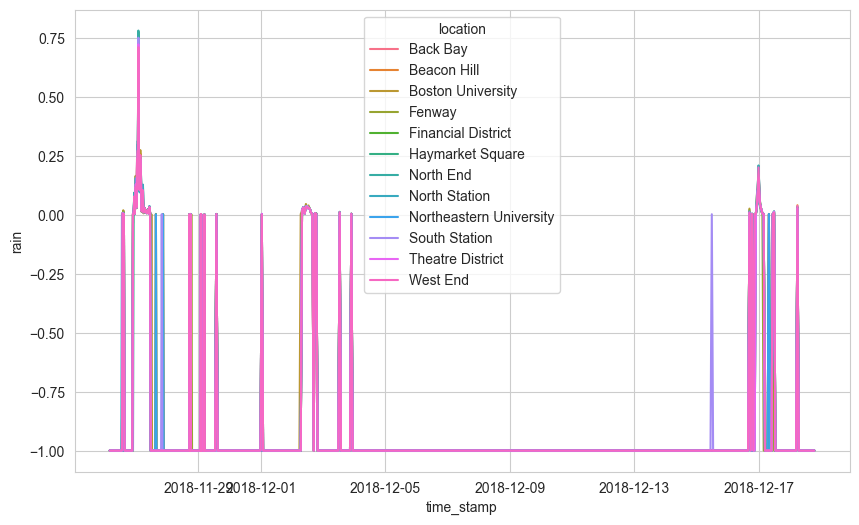

In [229]:
sns.set_style("whitegrid")
plt.figure(figsize=(10, 6))
sns.lineplot(x=weather.time_stamp,y=weather.rain.fillna(-1),hue=weather.location)

<Axes: xlabel='time_stamp', ylabel='rain'>

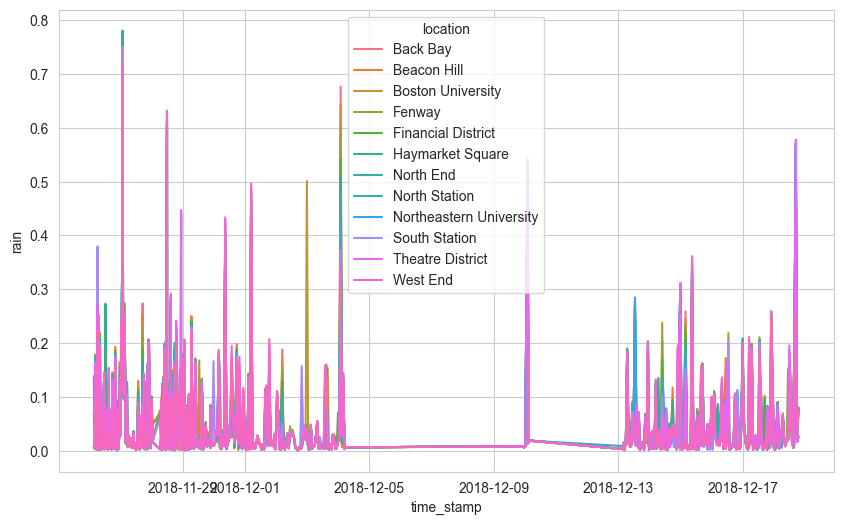

In [230]:
sns.set_style("whitegrid")
plt.figure(figsize=(10, 6))
sns.lineplot(weather.set_index(['time_stamp','location'])['rain'].interpolate(method='linear').reset_index(),
            x='time_stamp',y='rain',hue='location')

In [231]:
weather['rain'] = (weather
 .set_index(['time_stamp','location'])['rain']
 .interpolate(method='linear')
 .reset_index()
 ['rain'])

# Merge data


Merge ride and weather data by rounding both to the nearest hour, with rides every 5 minutes and weather updates hourly.

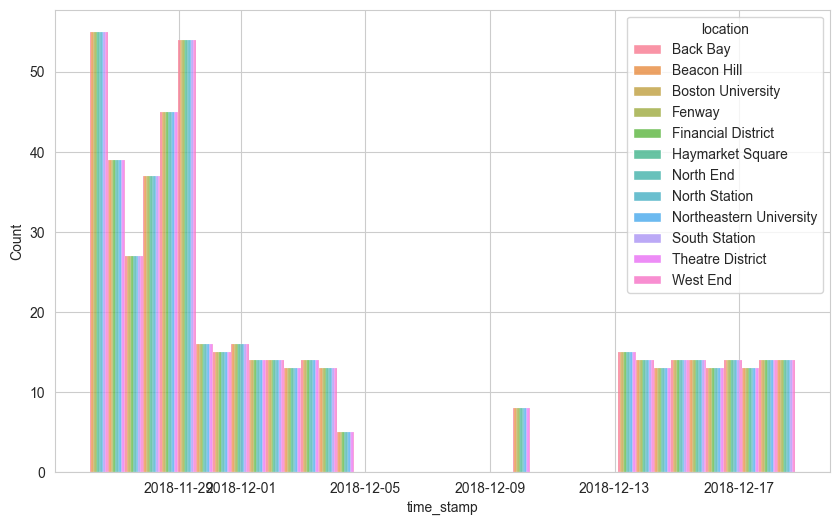

In [232]:
plt.figure(figsize=(10, 6))
sns.histplot(weather, x='time_stamp', hue='location',bins=40,multiple="dodge")
plt.show()

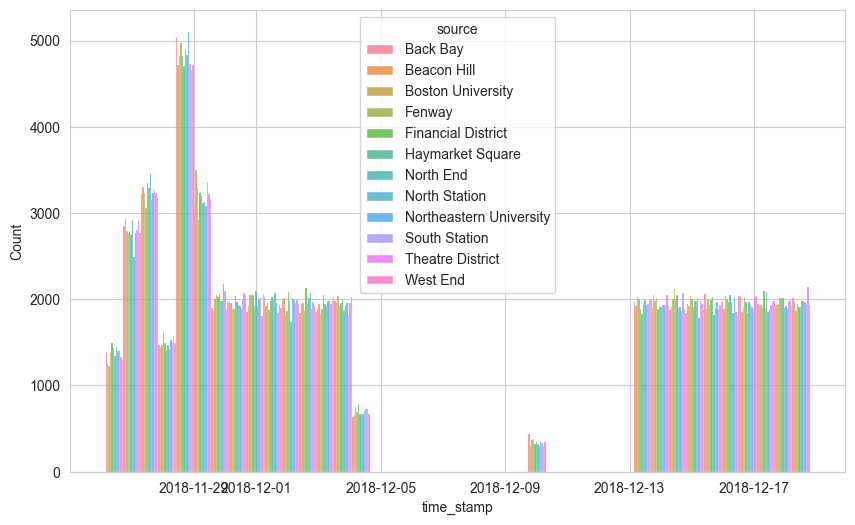

In [233]:
plt.figure(figsize=(10, 6))
sns.histplot(rides, x='time_stamp', hue='source',bins=40,multiple="dodge")
plt.show()

In [234]:
rides_hours = rides.assign(date_hour=lambda x: x['time_stamp'].dt.strftime('%Y-%m-%d %H:00'))

In [235]:
weather_hours = weather.assign(date_hour=lambda x: x['time_stamp'].dt.strftime('%Y-%m-%d %H:00')).drop(columns='time_stamp')

In [236]:
del rides
del weather
gc.collect()

720328

In [237]:
dest_wmap = {x:"dest_"+x for x in weather_hours.columns if x not in ['location','date_hour']}
dest_wmap['location']='destination'
source_wmap = {x:"source_"+x for x in weather_hours.columns if x not in ['location','date_hour']}
source_wmap['location']='source'

<Axes: xlabel='date_hour', ylabel='Count'>

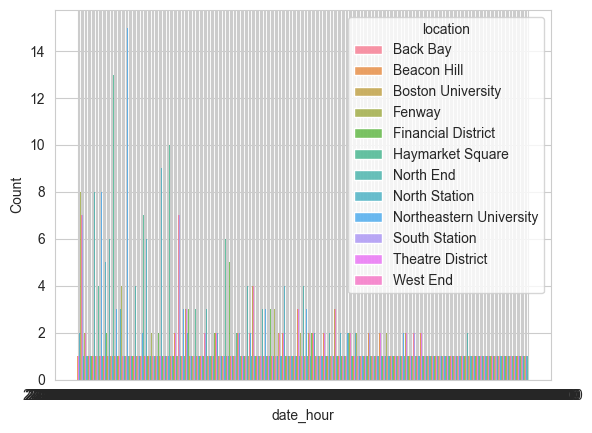

In [238]:
sns.histplot(weather_hours, x='date_hour', hue ='location', bins=40,multiple="dodge")

In [239]:
weather_hours=weather_hours.groupby(['date_hour','location']).mean().reset_index()

/var/folders/m4/j_mwks0x04ncx2w9srg4t8qh0000gn/T/ipykernel_23428/786841832.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  weather_hours=weather_hours.groupby(['date_hour','location']).mean().reset_index()


<Axes: xlabel='date_hour', ylabel='Count'>

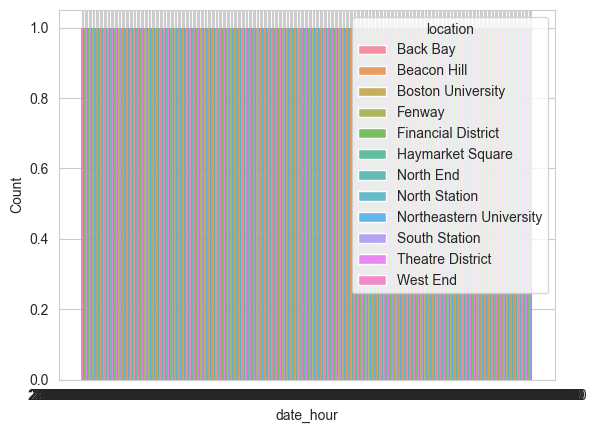

In [240]:
sns.histplot(weather_hours, x='date_hour', hue ='location',bins=40,multiple="dodge")

In [241]:
rides_hours.shape

(637976, 13)

In [242]:
data = rides_hours.merge(weather_hours.rename(columns=dest_wmap),on=['date_hour','destination'],how='left')
data = data.merge(weather_hours.rename(columns=source_wmap),on=['date_hour','source'])

In [243]:
del weather_hours
del rides_hours
gc.collect()

91892

In [244]:
data=data.drop(columns=['destination','source'])

In [245]:
from sklearn.model_selection import train_test_split
# Perform train-test split
train_df, test_df = train_test_split(data, test_size=0.2, random_state=2025)

print(f"Training set size: {train_df.shape[0]}")
print(f"Test set size: {test_df.shape[0]}")

Training set size: 508193
Test set size: 127049


In [246]:
del data
gc.collect()

0

# Feature engineering

In [247]:
train_df['weekday']=train_df['time_stamp'].dt.weekday
train_df['is_weekend'] = (train_df['weekday']>5).map({True:1,False:0})
test_df['weekday']=test_df['time_stamp'].dt.weekday
test_df['is_weekend'] = (test_df['weekday']>5).map({True:1,False:0})
train_df['time_sin'] = np.sin(2 * np.pi * (train_df.time_stamp.dt.hour/24+train_df.time_stamp.dt.minute/60))
test_df['time_sin'] = np.sin(2 * np.pi * (test_df.time_stamp.dt.hour/24+test_df.time_stamp.dt.minute/60))

train_df=train_df.drop(columns=['date_hour'])
test_df=test_df.drop(columns=['date_hour'])

In [248]:
train_df_=train_df.copy()
test_df_=test_df.copy()

In [249]:
train_df=train_df.set_index('time_stamp')
test_df=test_df.set_index('time_stamp')

In [250]:
diffs = {x.split("_")[1] + '_diff': [x,'dest_' + x.split("_")[1]] for x in train_df.columns if x.startswith('source_')}
for res,x in diffs.items():
    train_df[res]=train_df[x[0]]-train_df[x[1]]
    test_df[res]=test_df[x[0]]-test_df[x[1]]

In [251]:
train_df

Uber  distance  price  surge_multiplier  name  \
time_stamp                                                               
2018-11-27 00:43:39.674     1      1.00    7.5              1.00     1   
2018-11-26 23:06:10.321     0      2.30   32.5              1.00     6   
2018-12-03 10:58:04.544     1      2.17    8.5              1.00     3   
2018-12-15 07:55:05.558     0      1.45   16.5              1.25     4   
2018-11-27 06:15:23.614     1      2.14    8.0              1.00     1   
...                       ...       ...    ...               ...   ...   
2018-12-18 12:45:07.721     1      1.97   22.5              1.00     5   
2018-11-27 08:57:22.129     1      2.62    9.5              1.00     3   
2018-12-17 02:40:06.911     1      1.10   14.5              1.00     5   
2018-12-15 23:20:09.880     0      1.54   11.0              1.00     3   
2018-12-14 13:25:05.562     0      0.63   16.5              1.00     5   

                         source_latitude  source_longitude  dest_latitude  \
time_stamp                                                                  
2018-11-27 00:43:39.674          42.3640          -71.0603        42.3601   
2018-11-26 23:06:10.321          42.3570          -71.0733        42.3640   
2018-12-03 10:58:04.544          42.3655          -71.0625        42.3522   
2018-12-15 07:55:05.558          42.3601          -71.0700        42.3643   
2018-11-27 06:15:23.614          42.3663          -71.0651        42.3522   
...                                  ...               ...            ...   
2018-12-18 12:45:07.721          42.3643          -71.0542        42.3601   
2018-11-27 08:57:22.129          42.3500          -71.0622        42.3505   
2018-12-17 02:40:06.911          42.3570          -71.0733        42.3383   
2018-12-15 23:20:09.880          42.3570          -71.0733        42.3505   
2018-12-14 13:25:05.562          42.3500          -71.0622        42.3522   

                         dest_longitude  dest_temp  dest_clouds  \
time_stamp                                                        
2018-11-27 00:43:39.674        -71.0571    44.8725         0.98   
2018-11-26 23:06:10.321        -71.0603    44.4250         0.98   
2018-12-03 10:58:04.544        -71.0550    46.3200         0.92   
2018-12-15 07:55:05.558        -71.0542    45.5500         0.91   
2018-11-27 06:15:23.614        -71.0550    43.6300         1.00   
...                                 ...        ...          ...   
2018-12-18 12:45:07.721        -71.0700    23.9800         0.50   
2018-11-27 08:57:22.129        -71.1054    43.8850         1.00   
2018-12-17 02:40:06.911        -71.0892    39.4800         1.00   
2018-12-15 23:20:09.880        -71.1054    44.4400         0.37   
2018-12-14 13:25:05.562        -71.0550    32.5800         0.27   

                         dest_pressure  dest_rain  dest_humidity  dest_wind  \
time_stamp                                                                    
2018-11-27 00:43:39.674      1006.0275   0.157213        0.87375   10.64625   
2018-11-26 23:06:10.321      1008.1300   0.070550        0.88000    9.69500   
2018-12-03 10:58:04.544       999.4800   0.010161        0.94000    2.48000   
2018-12-15 07:55:05.558      1021.8600   0.003069        0.91000    6.49000   
2018-11-27 06:15:23.614       997.2750   0.018500        0.90500   10.45500   
...                                ...        ...            ...        ...   
2018-12-18 12:45:07.721      1008.7900   0.071350        0.51000   14.93000   
2018-11-27 08:57:22.129       994.8050   0.016000        0.92500   10.42000   
2018-12-17 02:40:06.911      1009.7400   0.007000        0.93000   10.23000   
2018-12-15 23:20:09.880      1022.0400   0.085131        0.69000    7.60000   
2018-12-14 13:25:05.562      1033.8500   0.001903        0.73000    3.41000   

                         source_temp  source_clouds  source_pressure  \
time_stamp                                                             
2018-11-27 00:43

# Numerical data processing

In [252]:
he.check_outliers(train_df)

distance


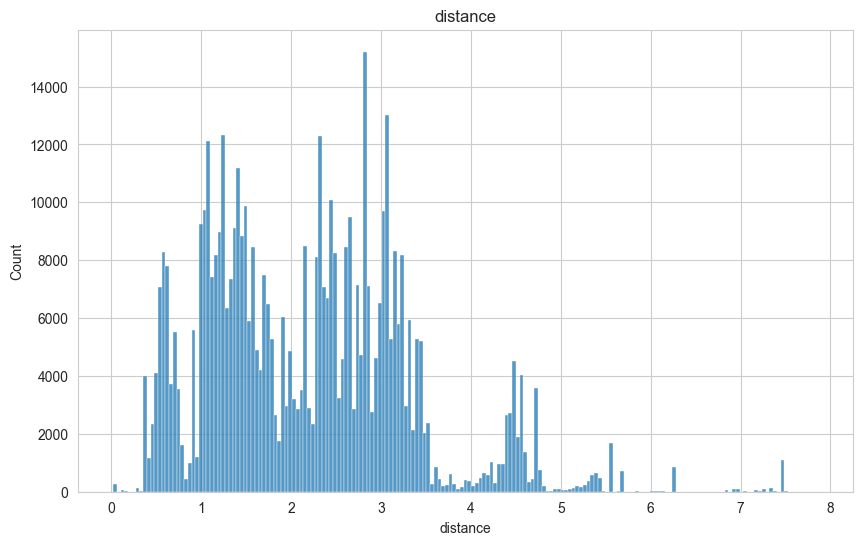

price


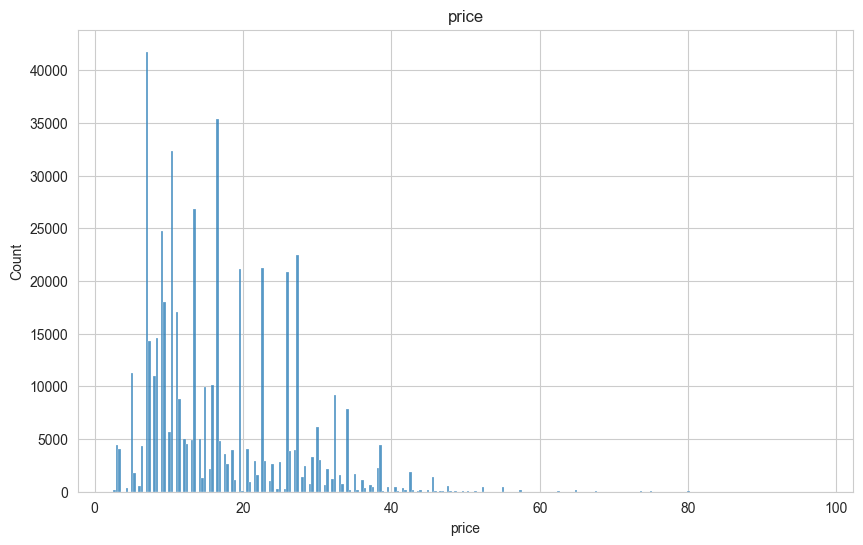

surge_multiplier


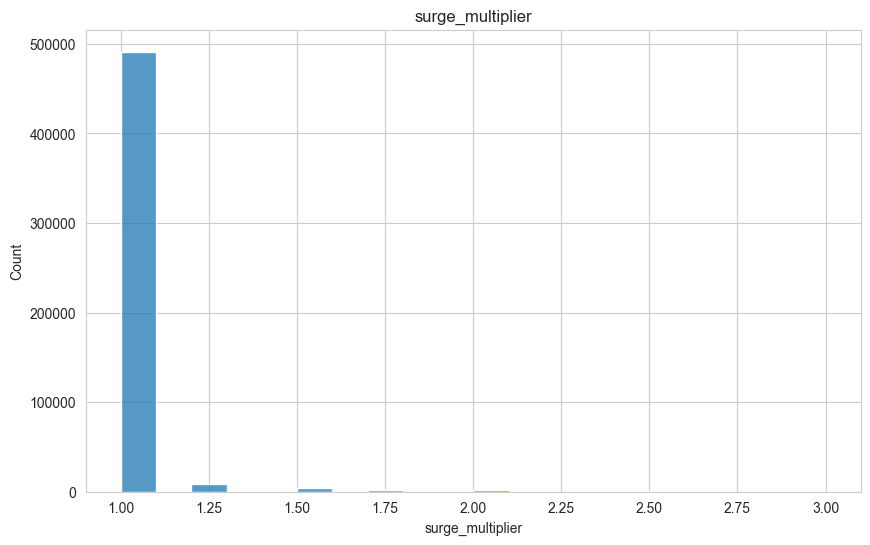

source_latitude


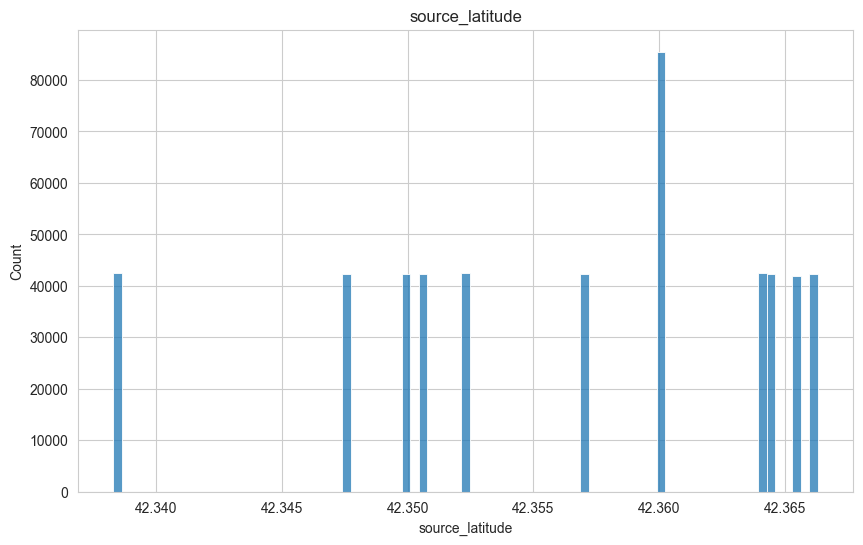

source_longitude


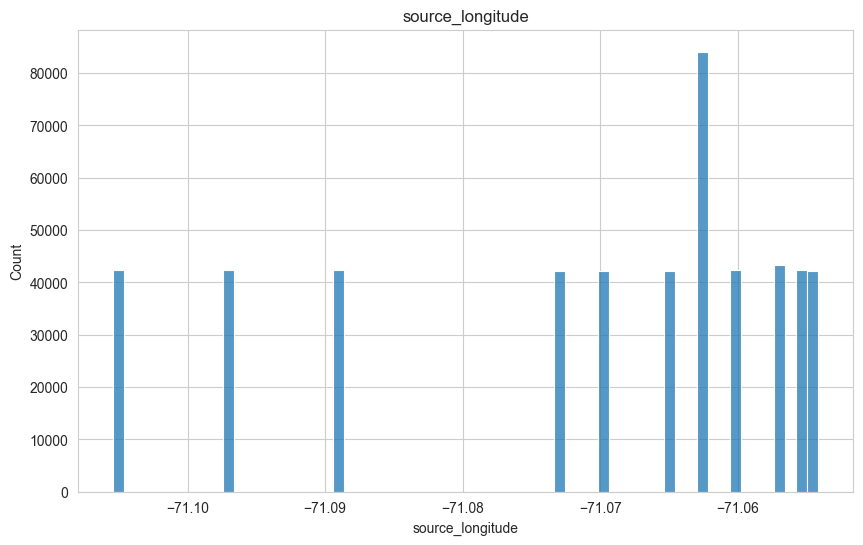

dest_latitude


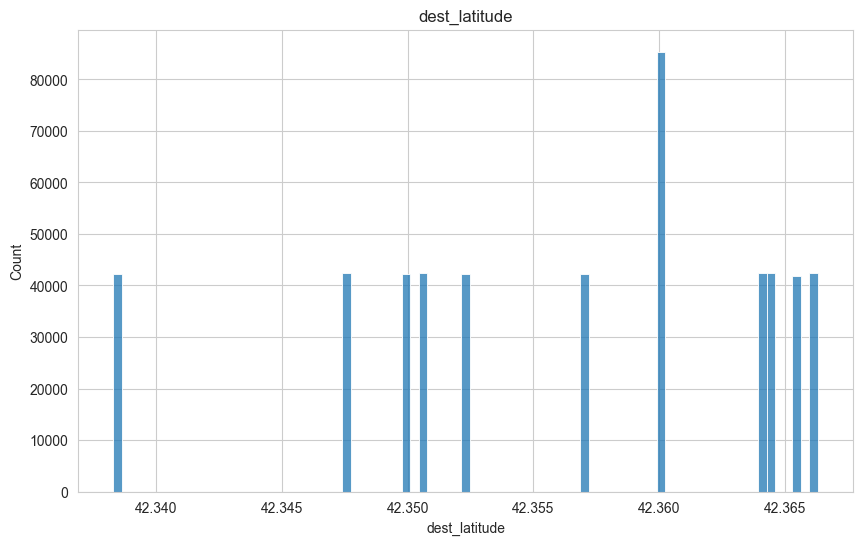

dest_longitude


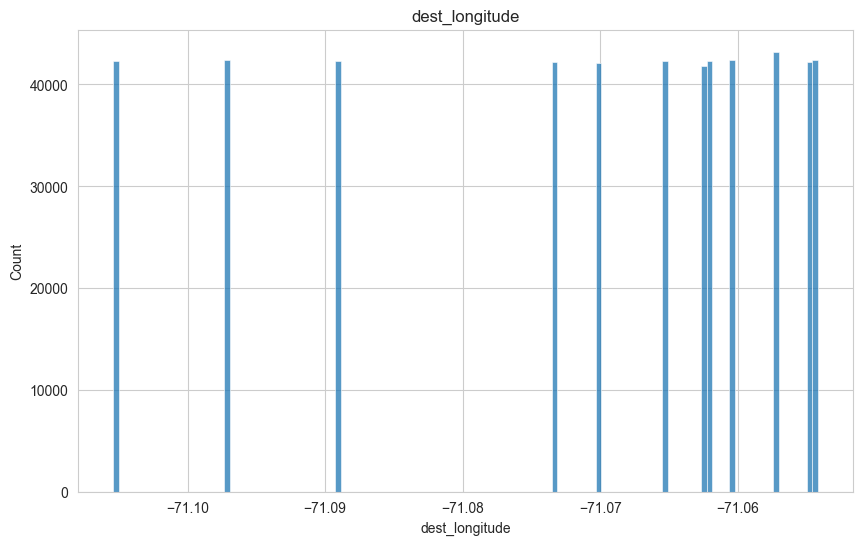

dest_temp


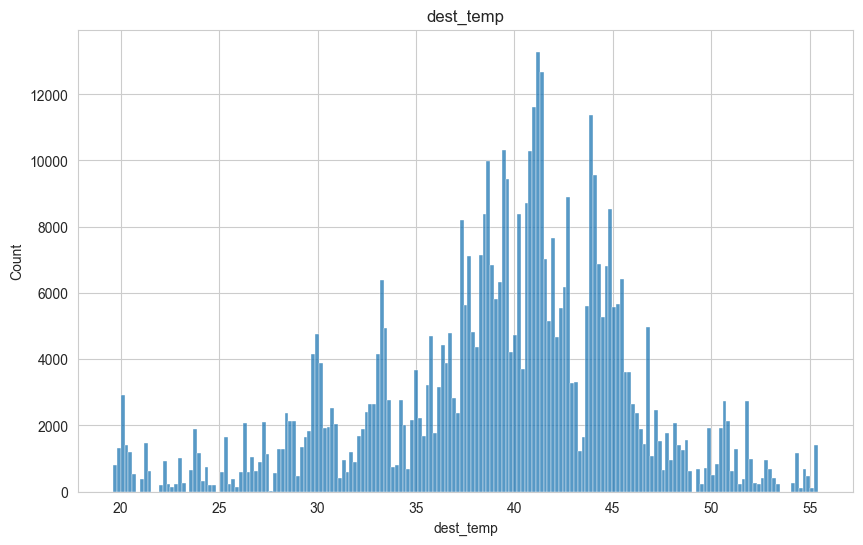

dest_clouds


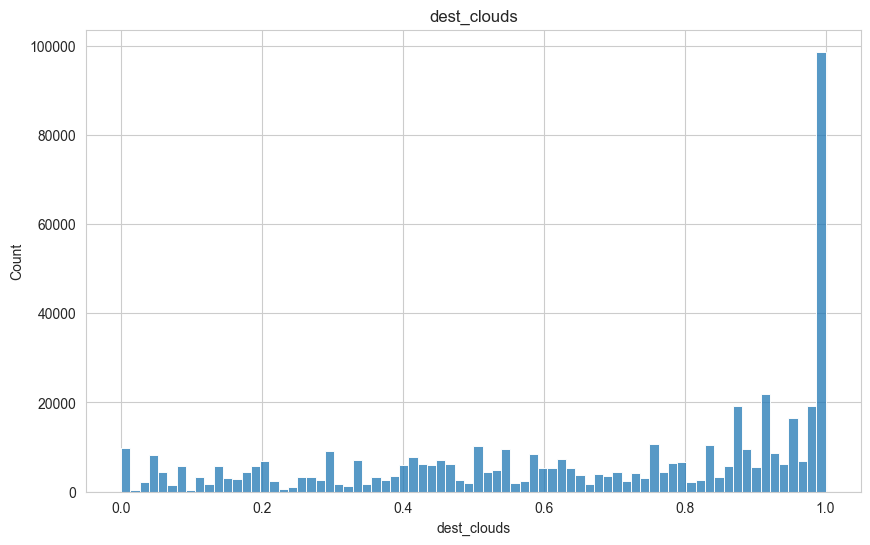

dest_pressure


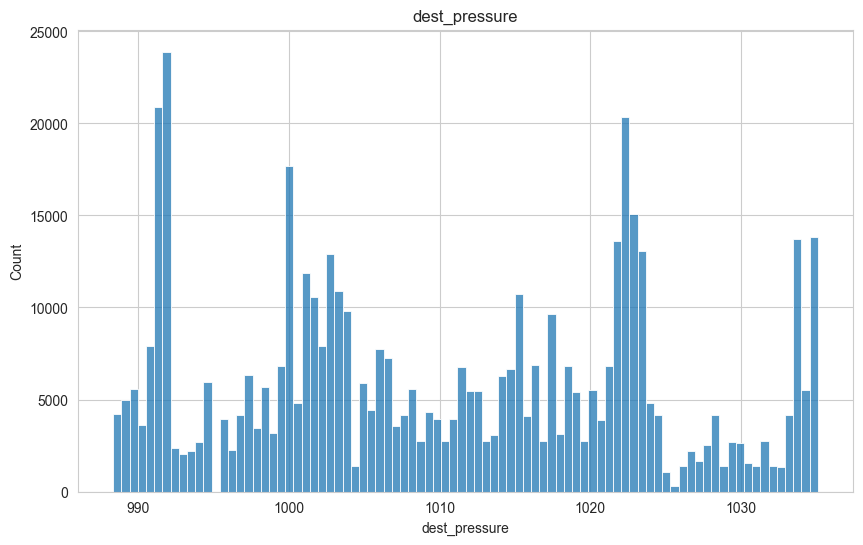

dest_rain


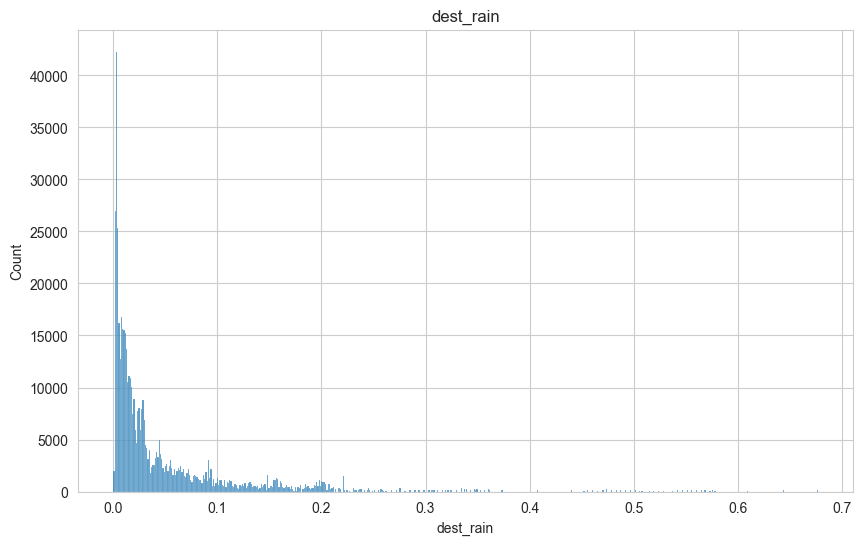

dest_humidity


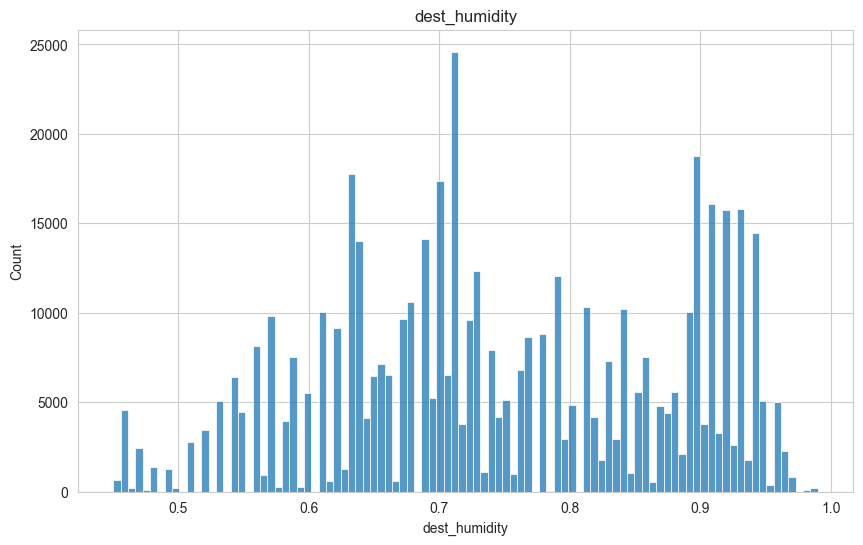

dest_wind


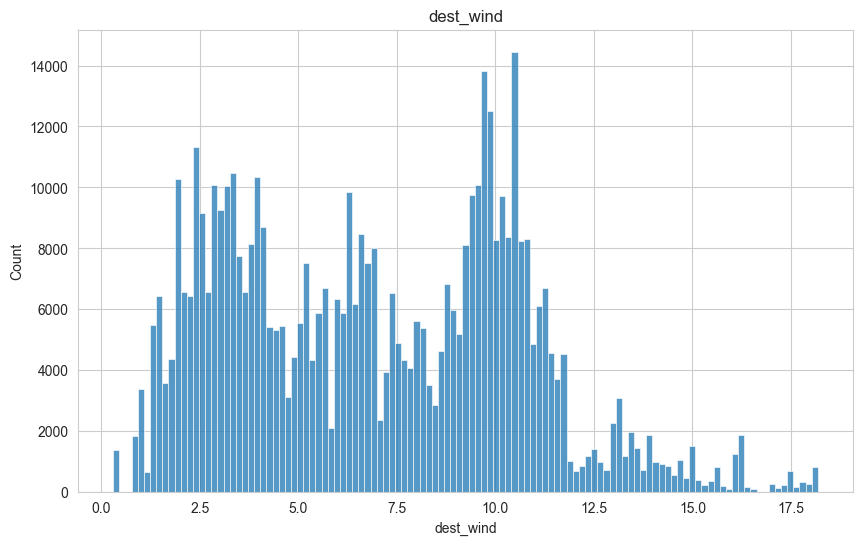

source_temp


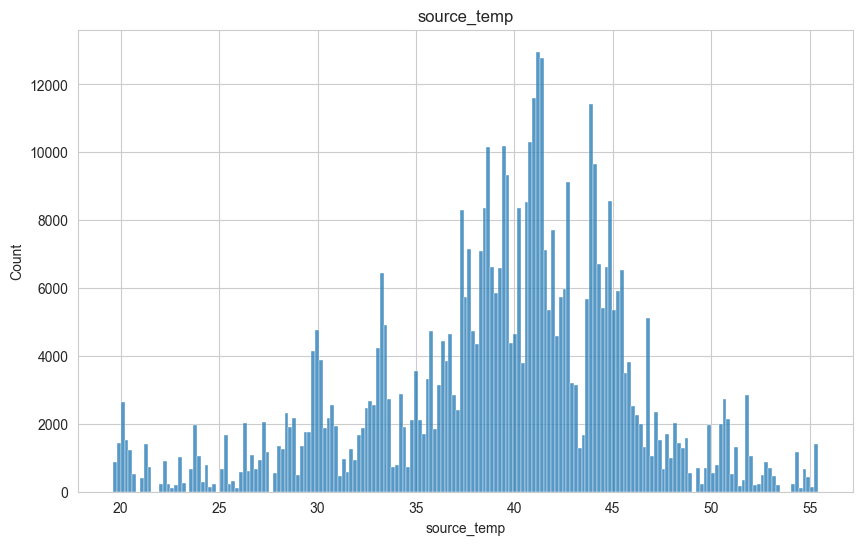

source_clouds


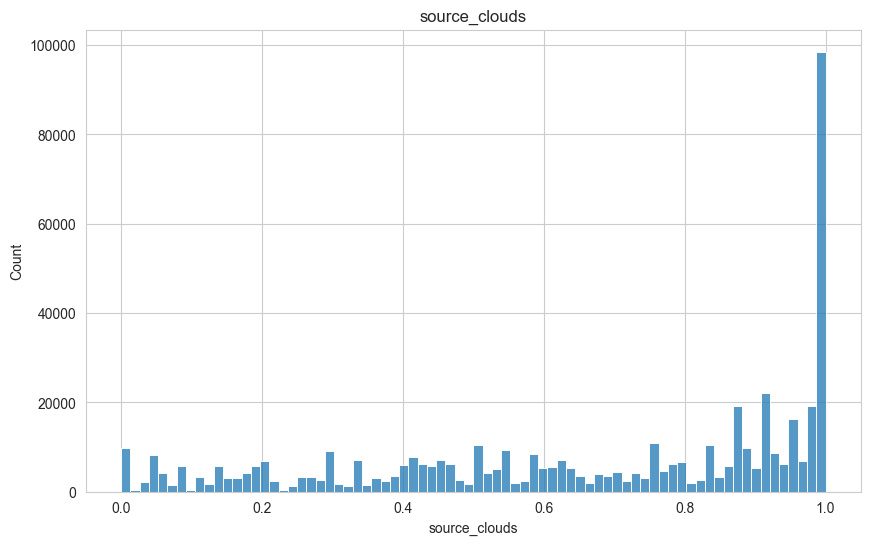

source_pressure


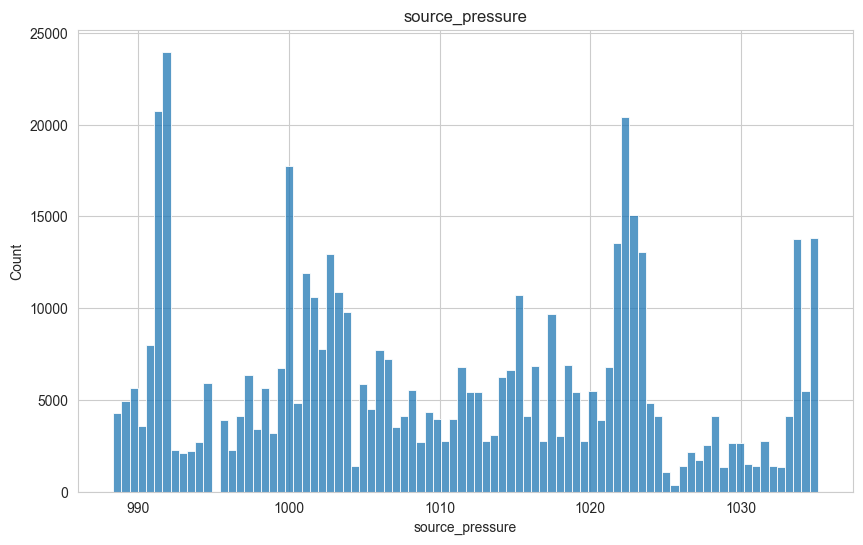

source_rain


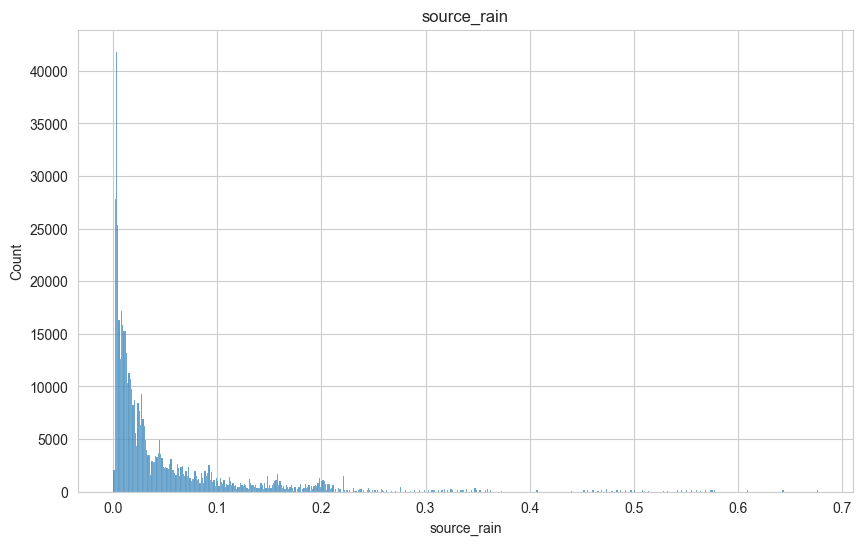

source_humidity


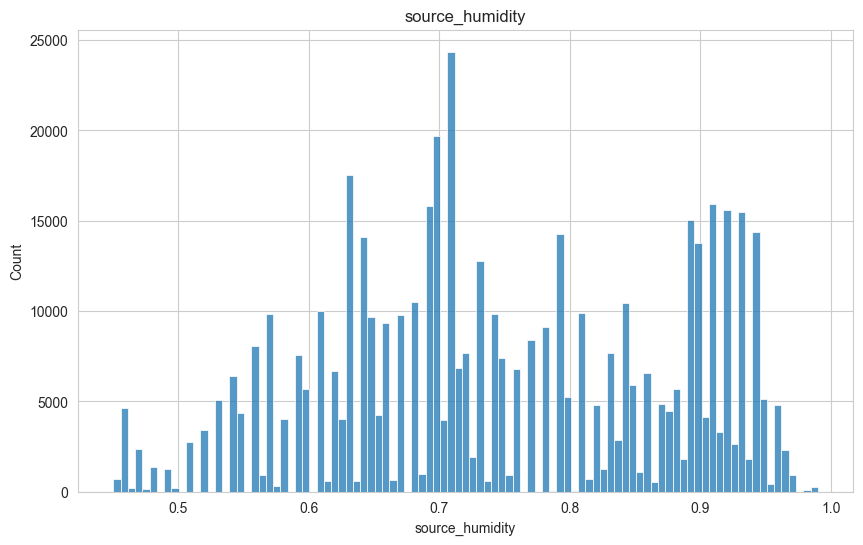

source_wind


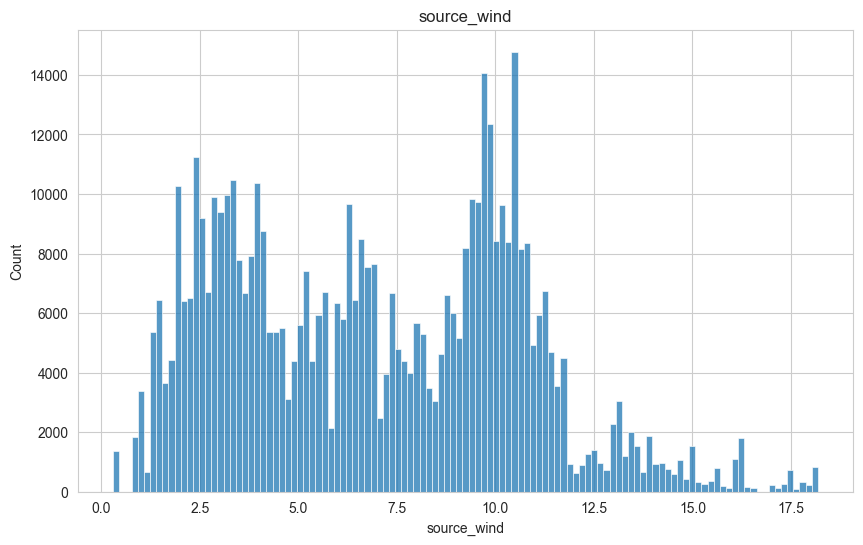

time_sin


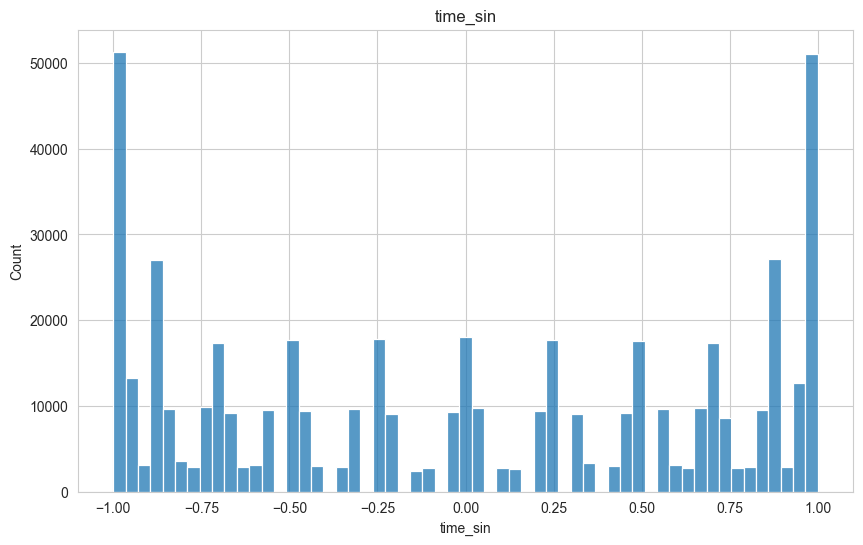

latitude_diff


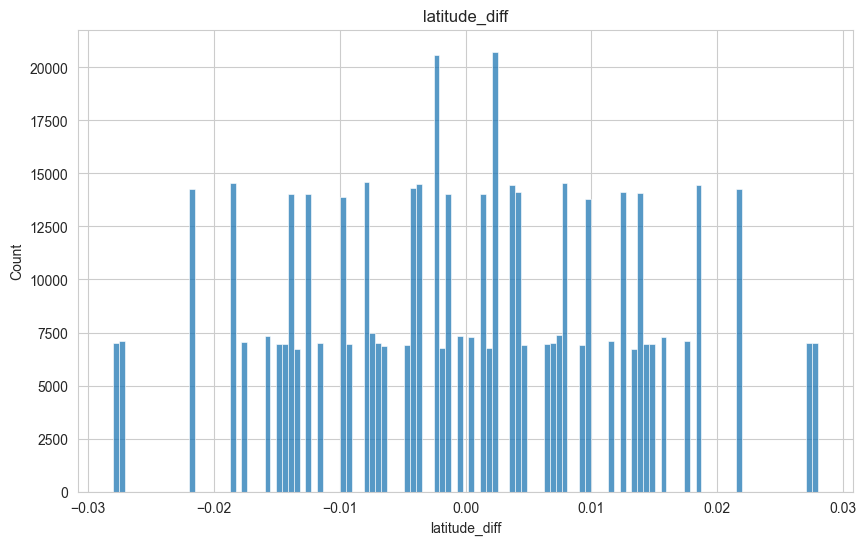

longitude_diff


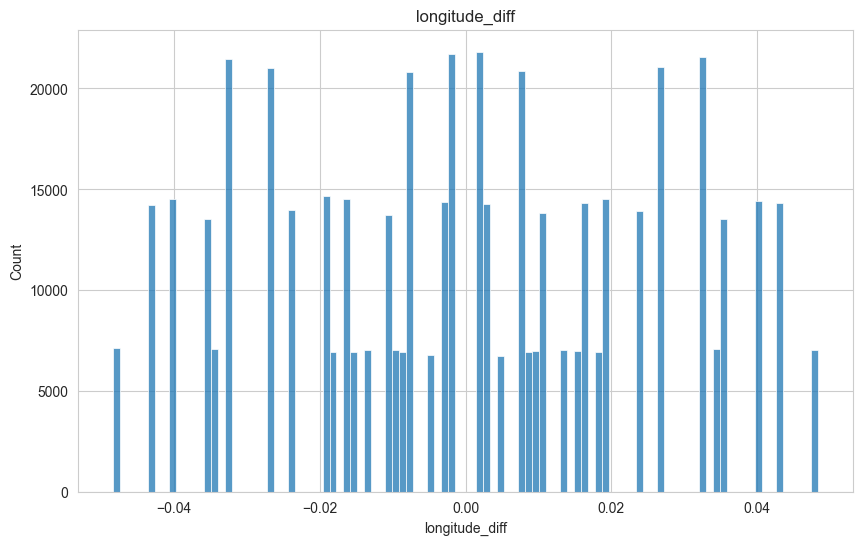

temp_diff


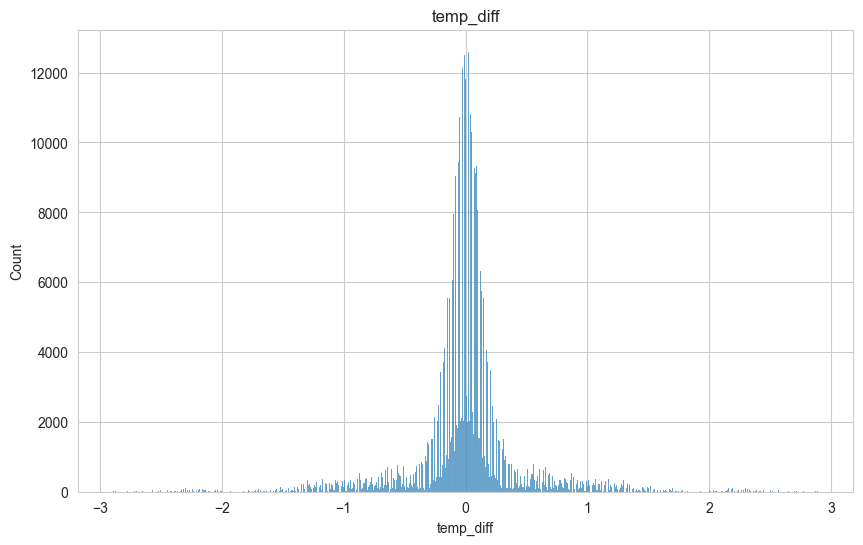

clouds_diff


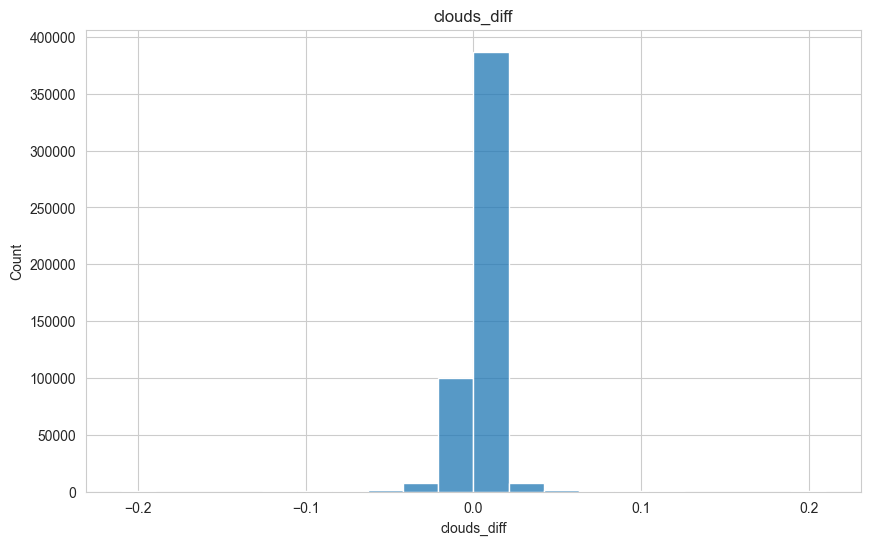

pressure_diff


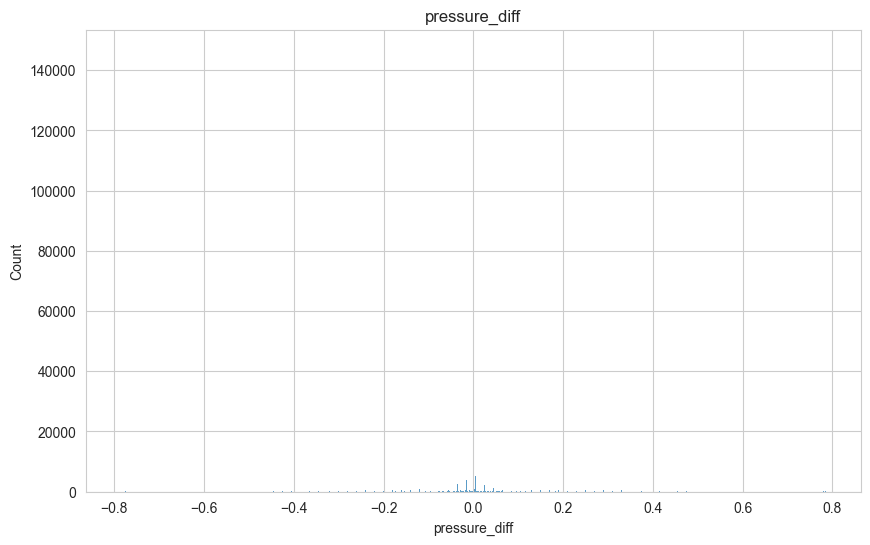

rain_diff


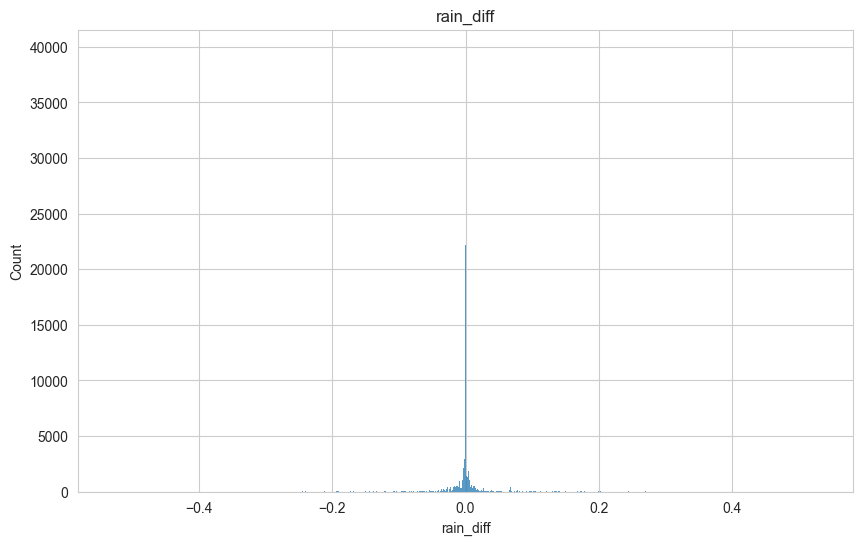

humidity_diff


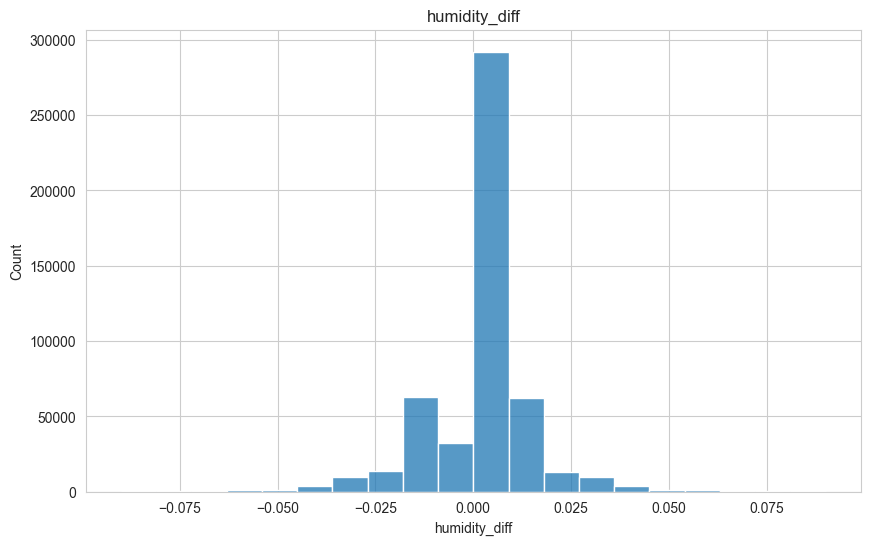

wind_diff


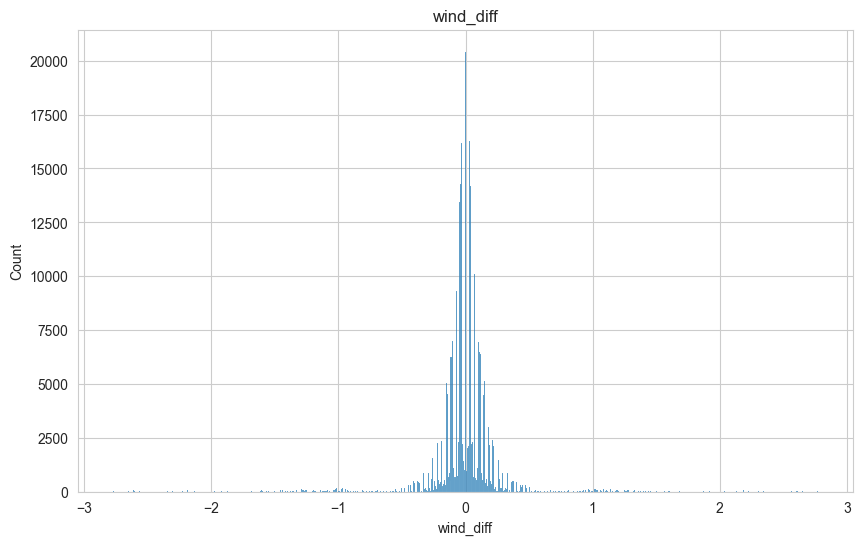

In [253]:
for col in [x for x in train_df.columns if train_df[x].dtype=='float']:
    plt.figure(figsize=(10, 6))
    sns.histplot(train_df[col])
    plt.title(col)
    print(col)
    plt.show()

In [254]:
num_process_params={
    'winsorize':[],
    "normalize":['distance',
                'dest_temp',
                'source_temp',
                'source_temp',
                'temp_diff',
                'dest_rain',
                'source_rain'
                ],
    'standardize':['source_latitude',
                'source_longitude',
                'dest_latitude',
                'dest_longitude',
                'dest_clouds',
                'dest_pressure',
                'dest_humidity',
                'dest_wind',
                'source_clouds',
                'source_pressure',
                'source_humidity',
                'source_wind'],
    'log':[],
    'none':['price',
            'surge_multiplier',
            'latitude_diff',
            'longitude_diff',
            'clouds_diff',
            'pressure_diff',
            'rain_diff',
            'humidity_diff',
            'wind_diff',
            'time_sin',
            'Uber',
            'price',
            'surge_multiplier',
            'name',
            'is_weekend',
            ]
}

In [255]:
# train_df,test_df=
train_df,test_df=he.process_num(train_df,test_df,num_process_params)

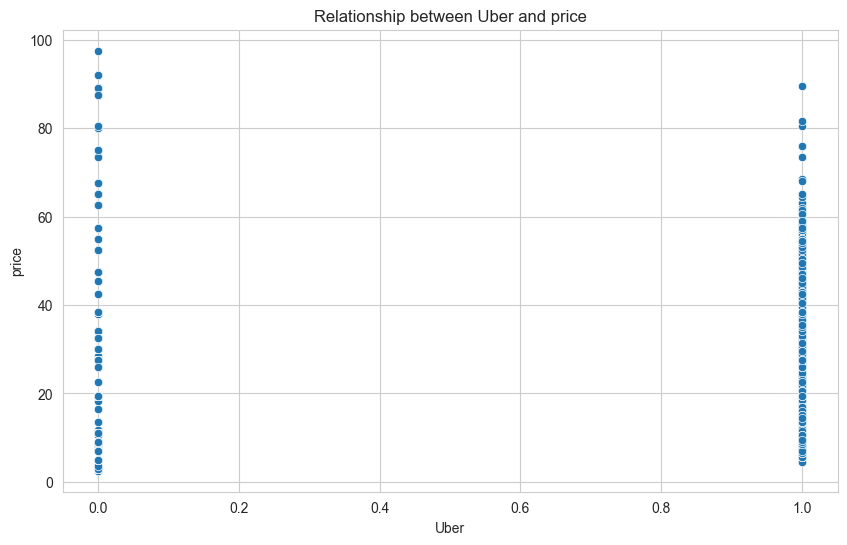

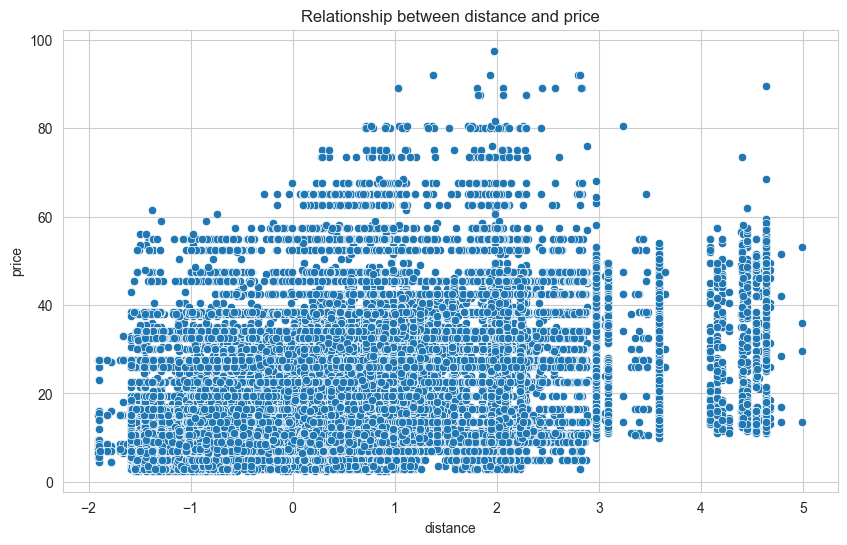

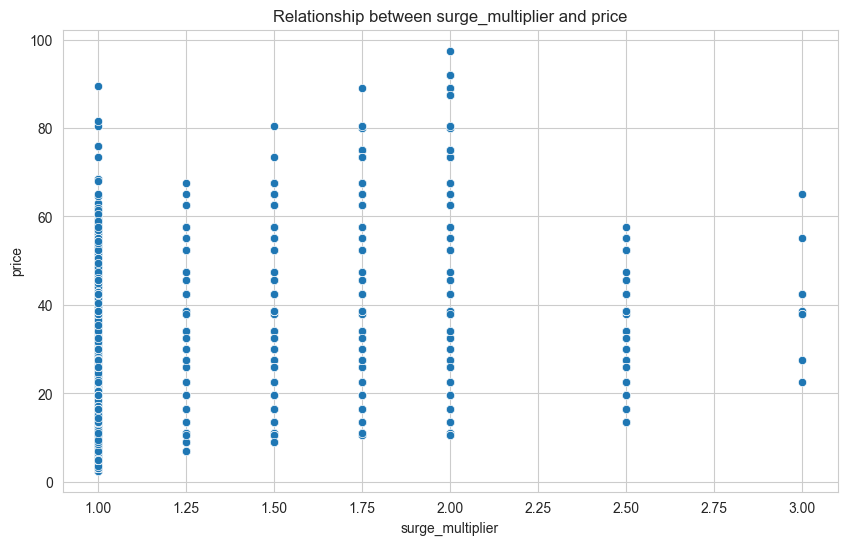

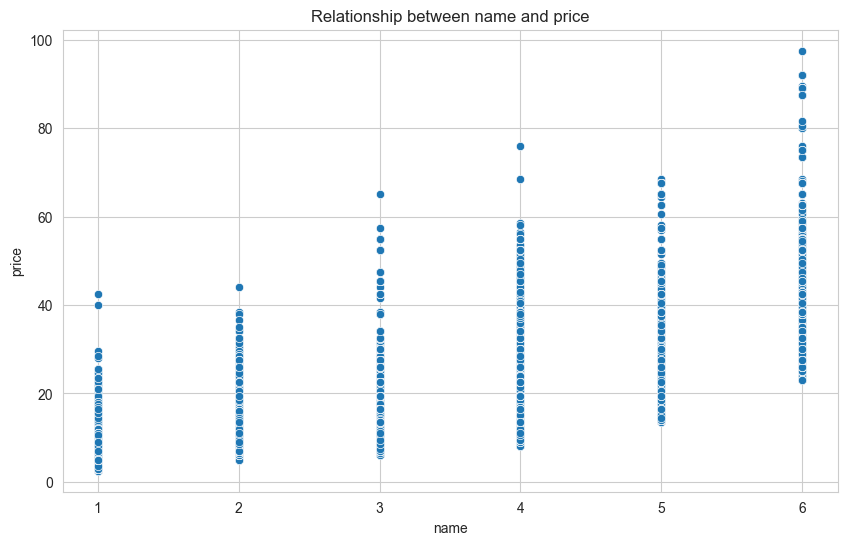

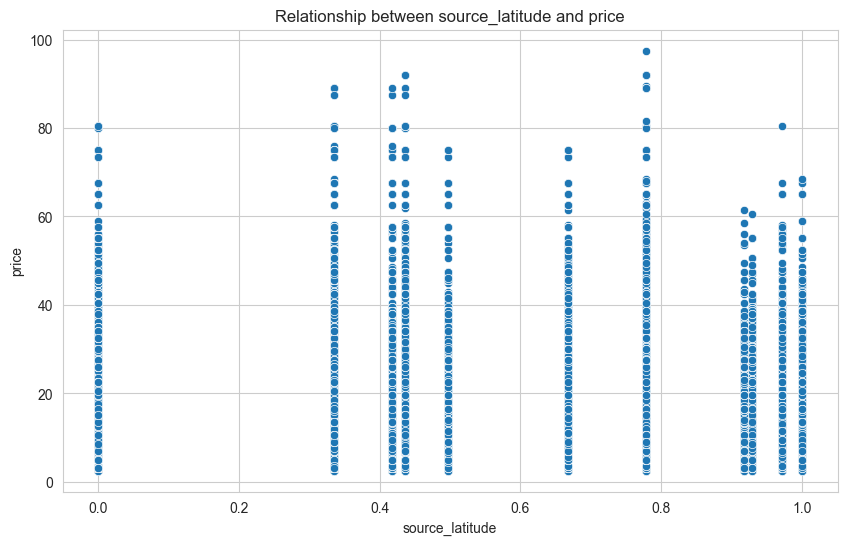

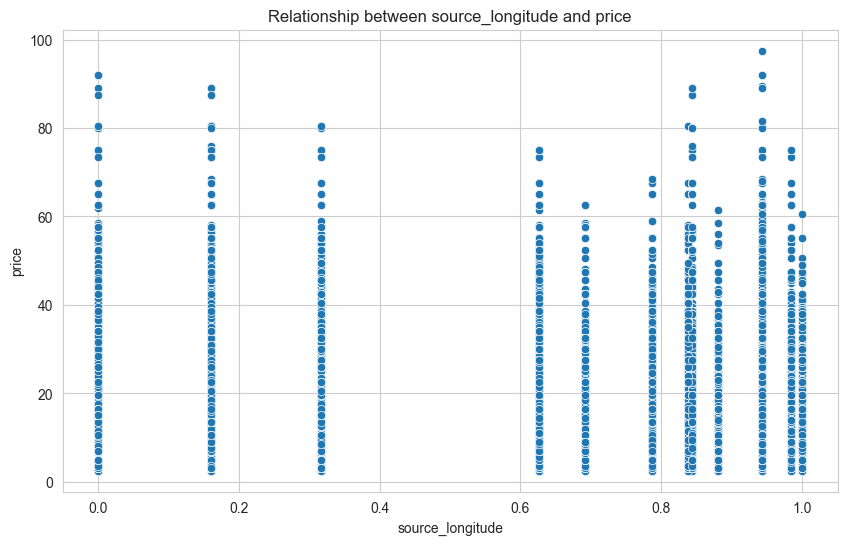

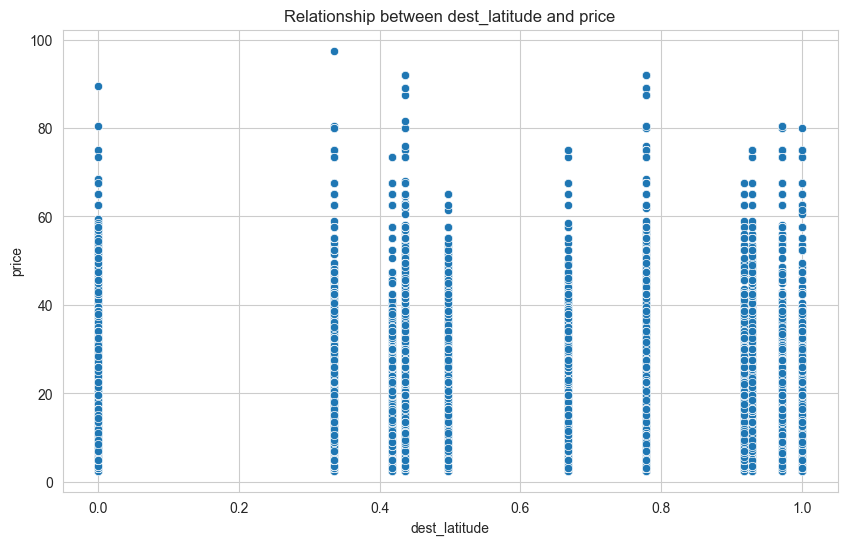

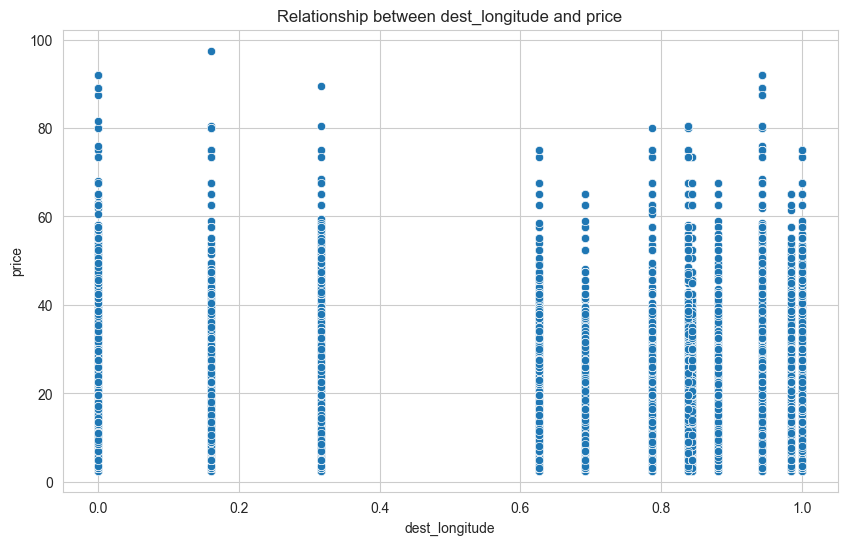

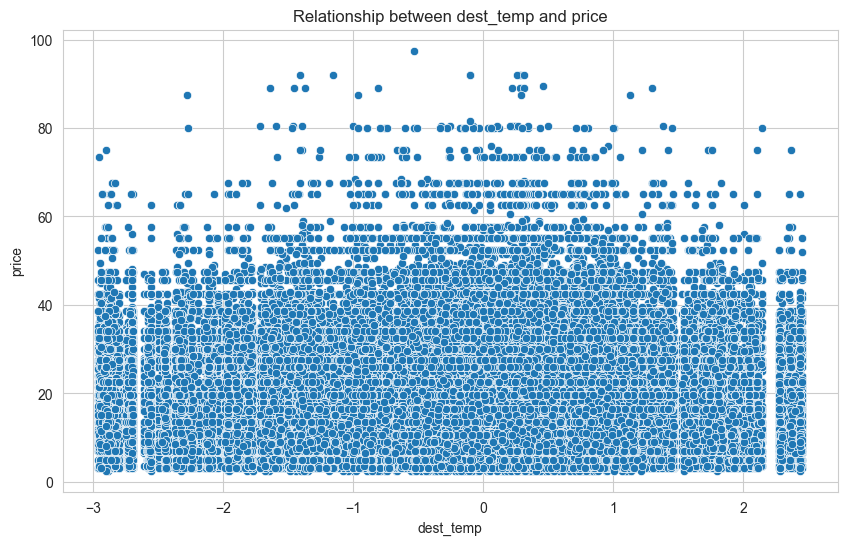

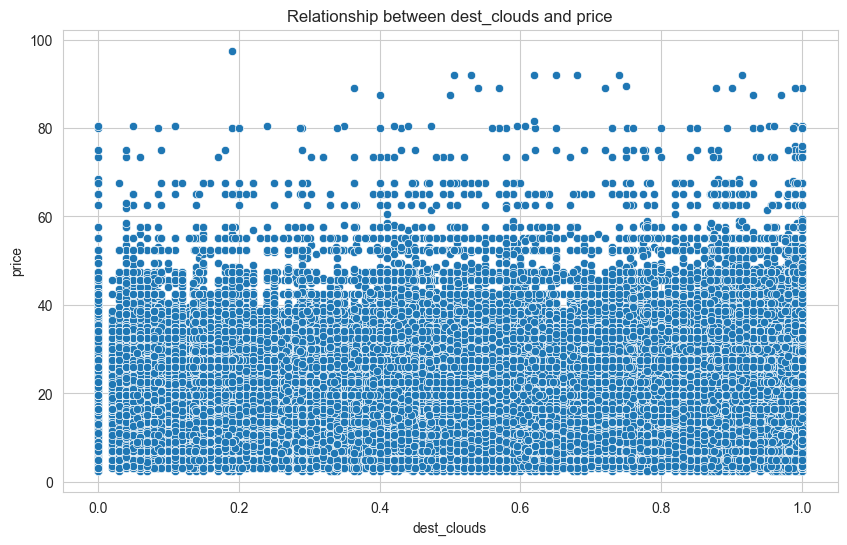

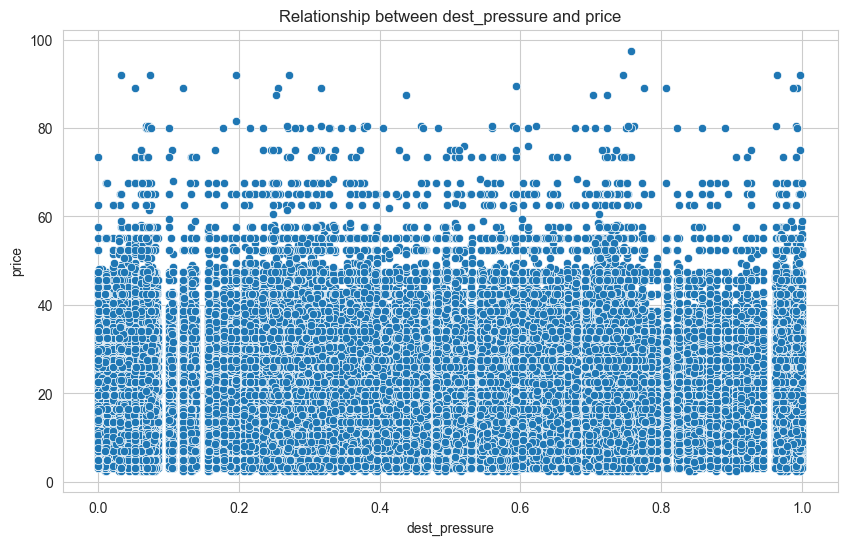

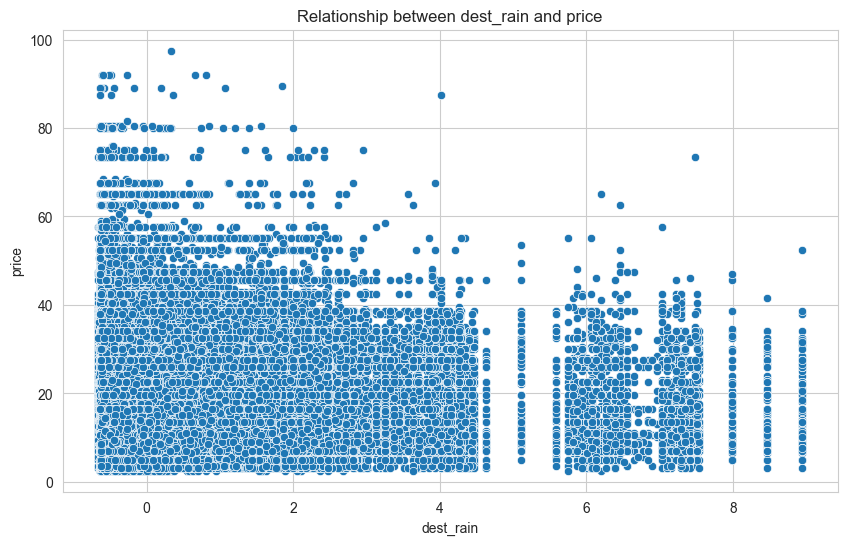

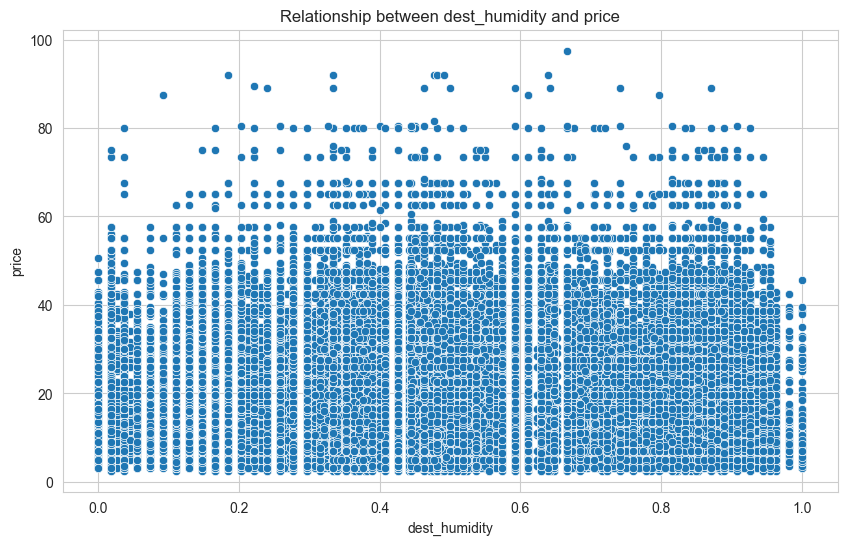

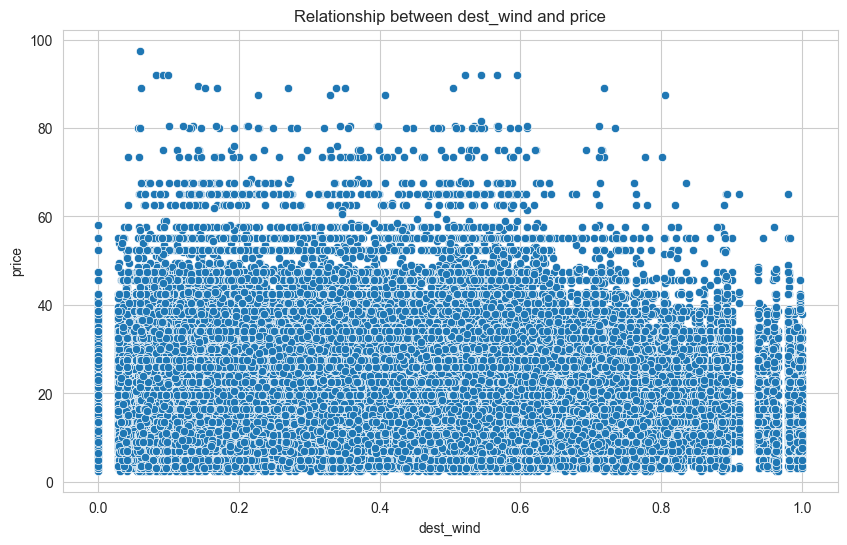

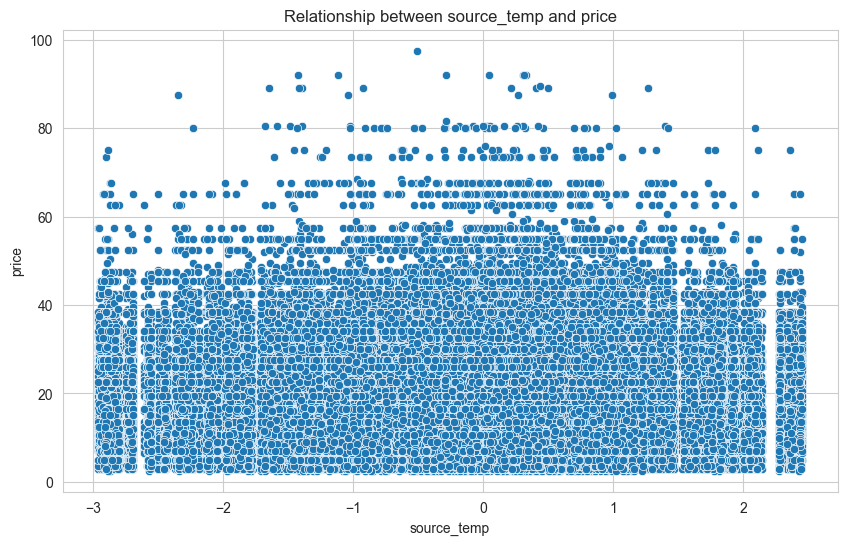

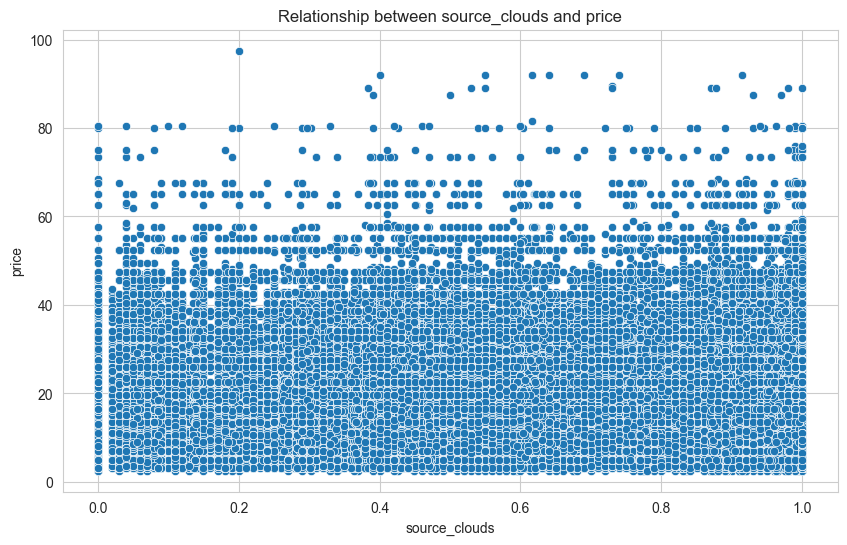

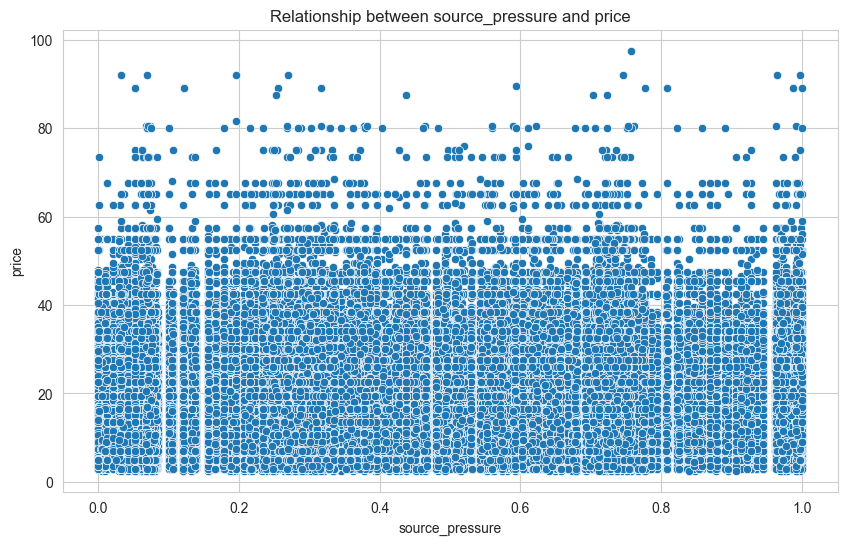

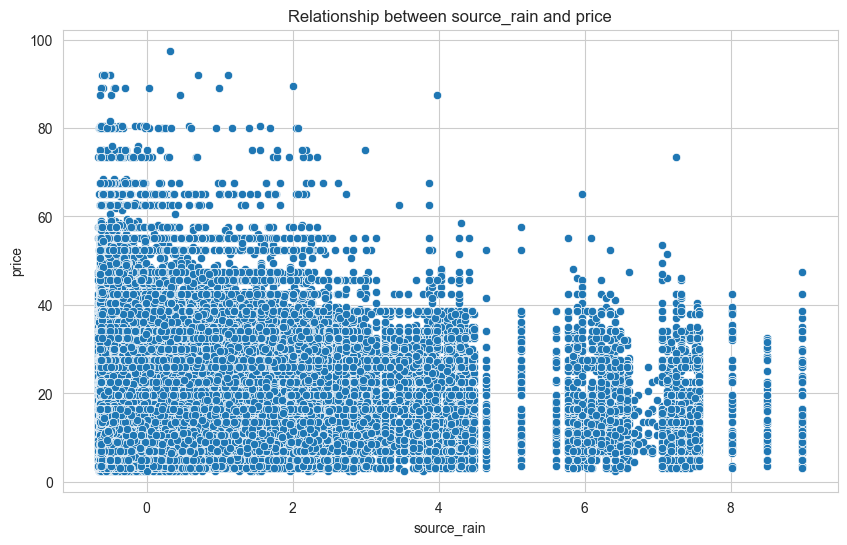

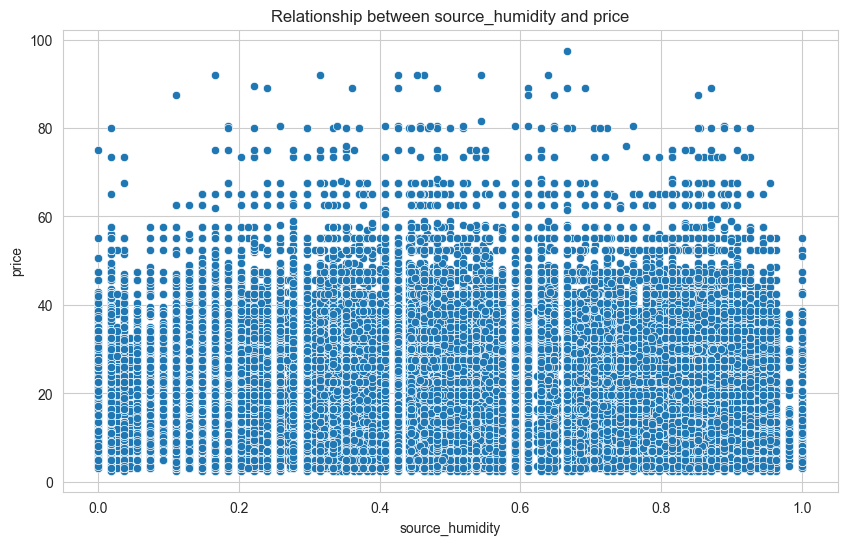

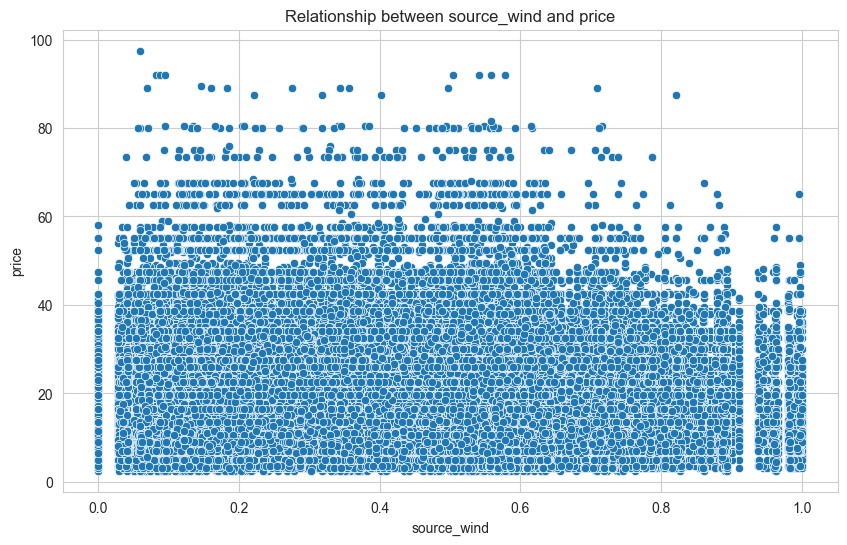

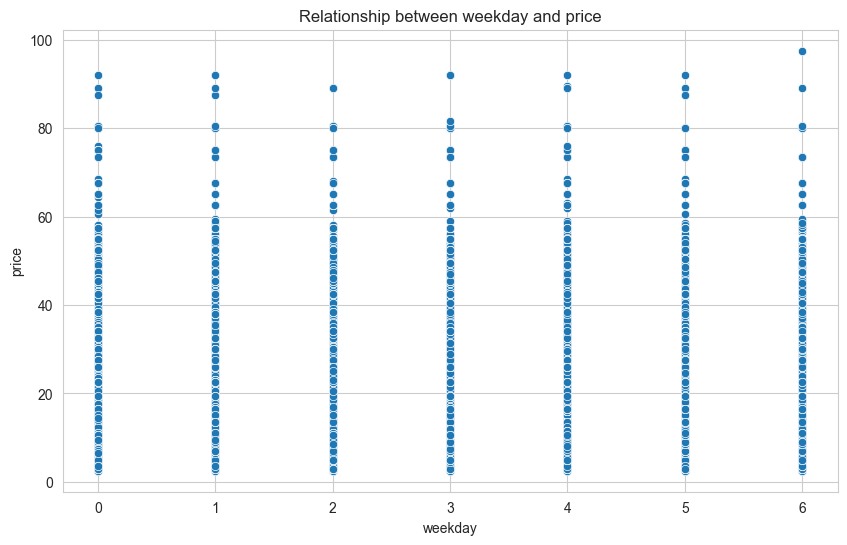

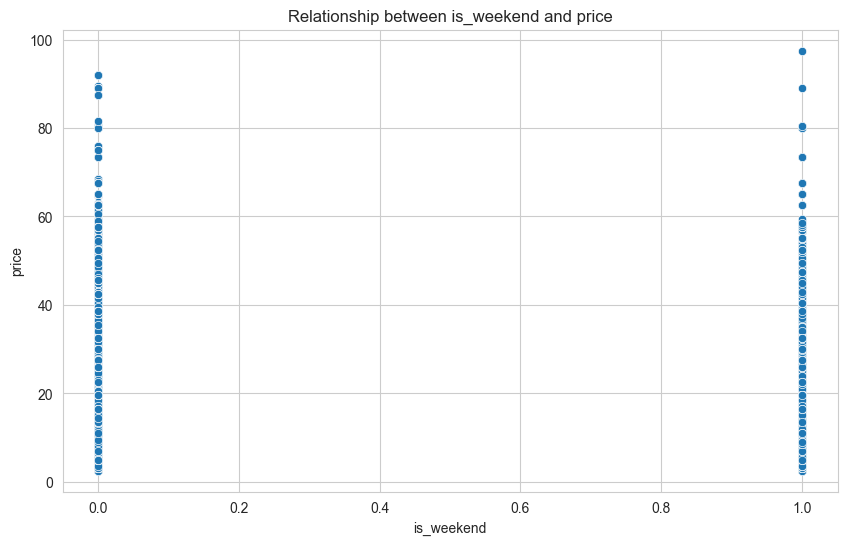

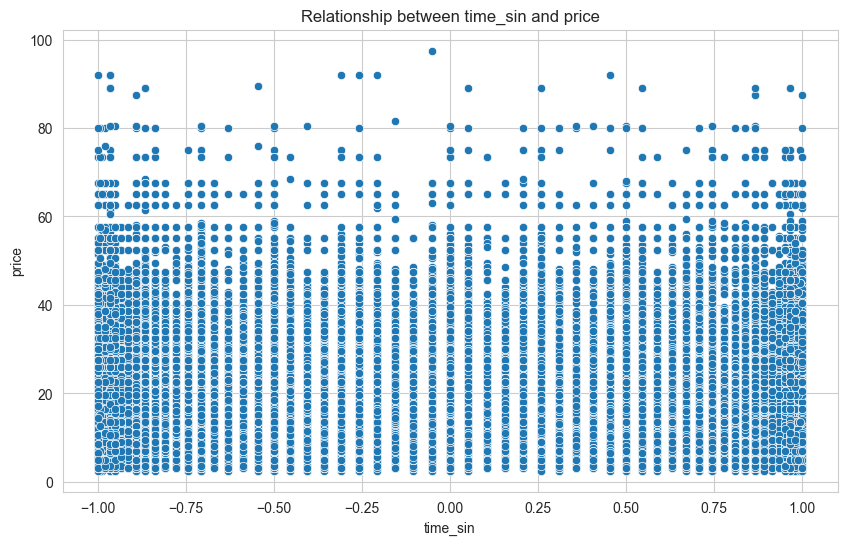

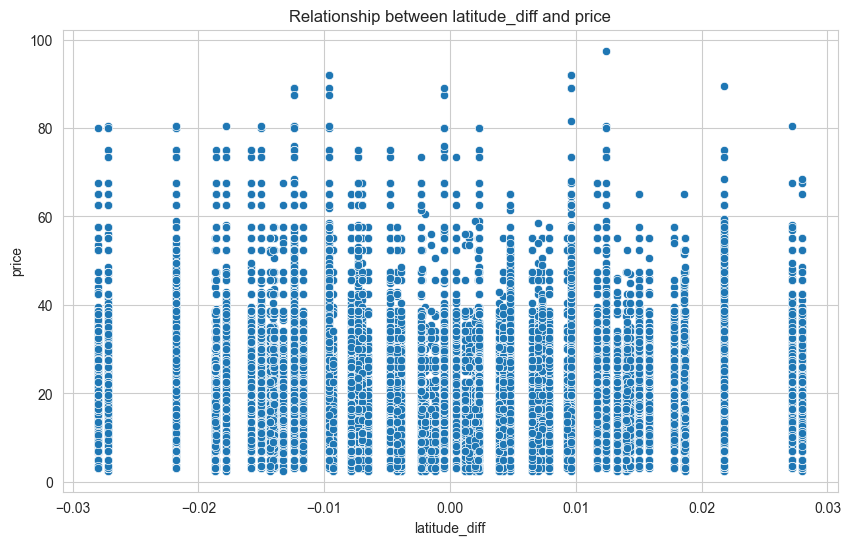

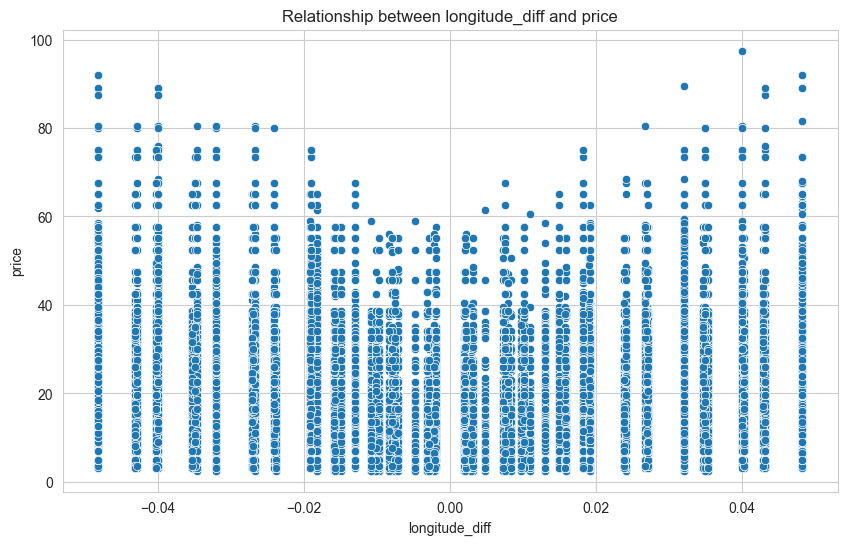

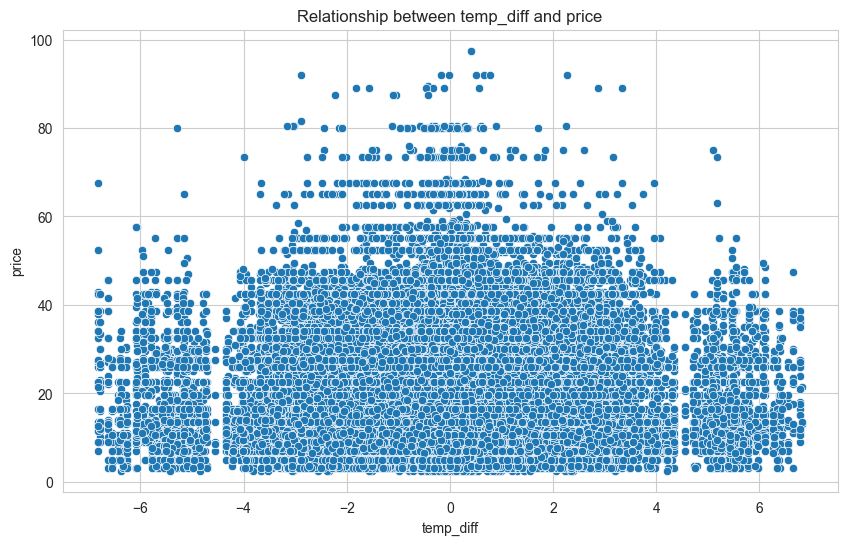

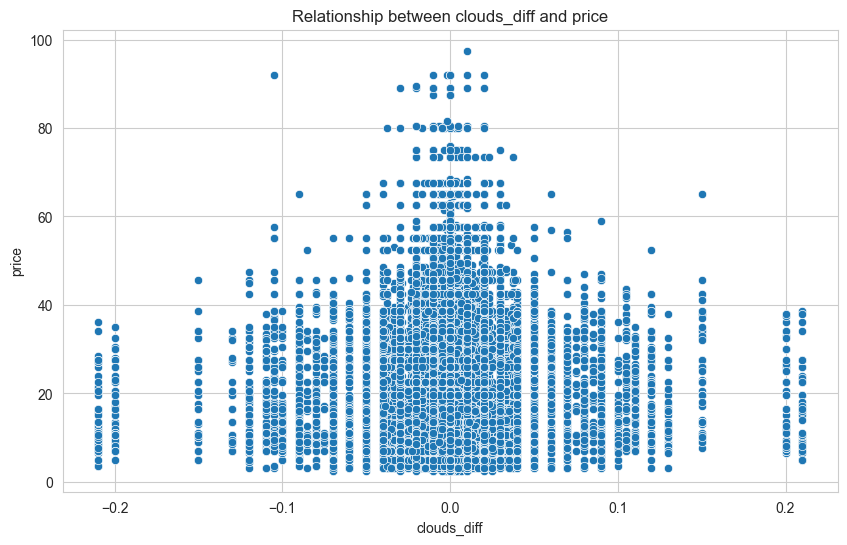

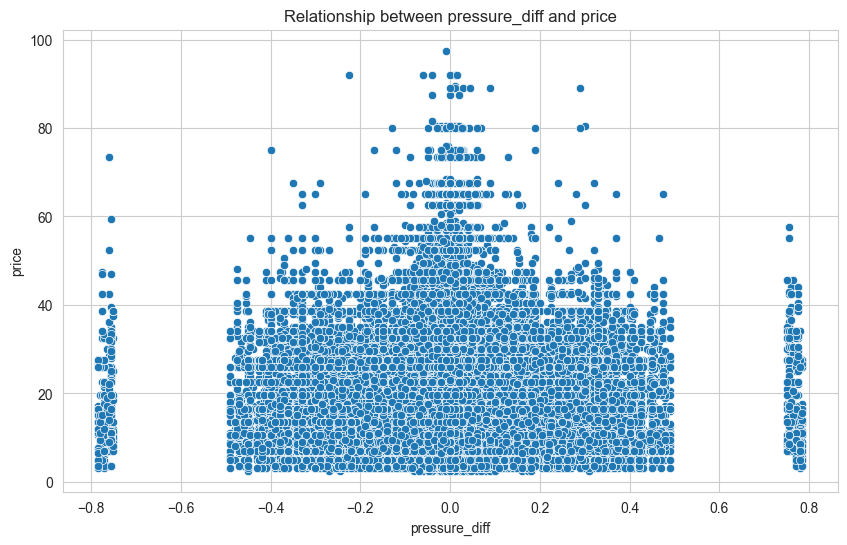

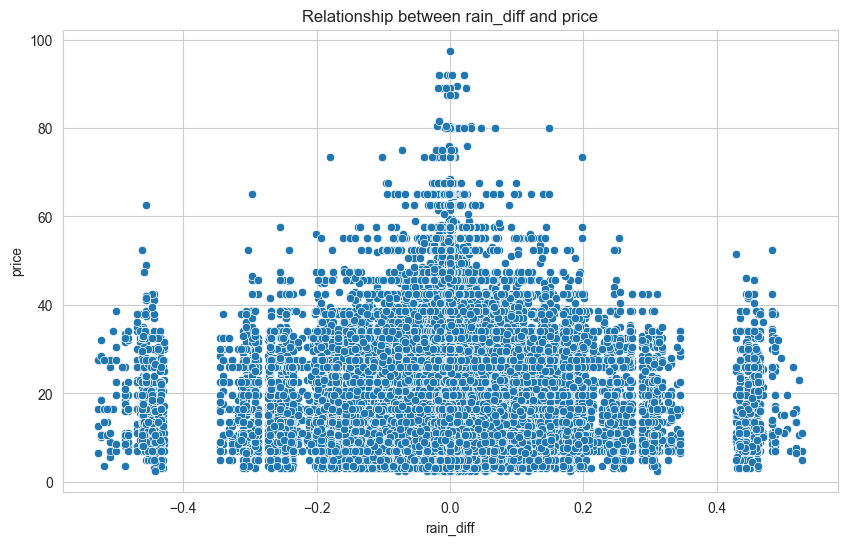

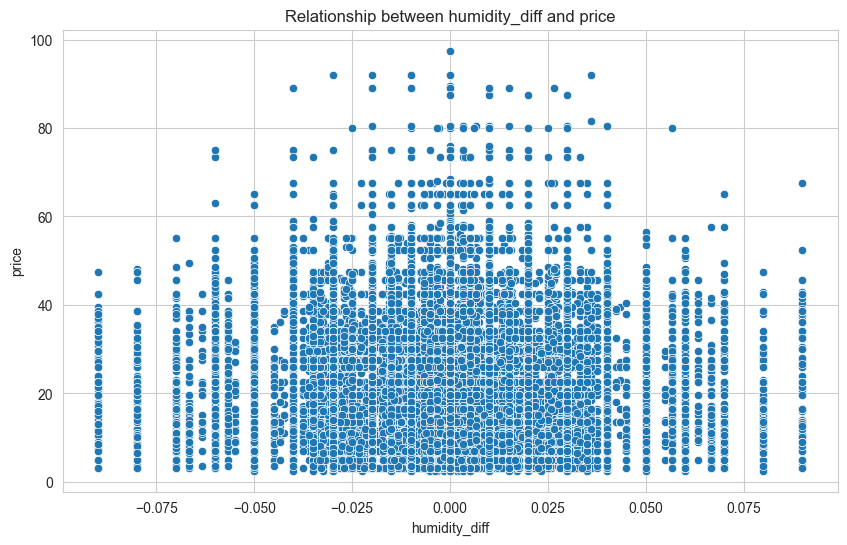

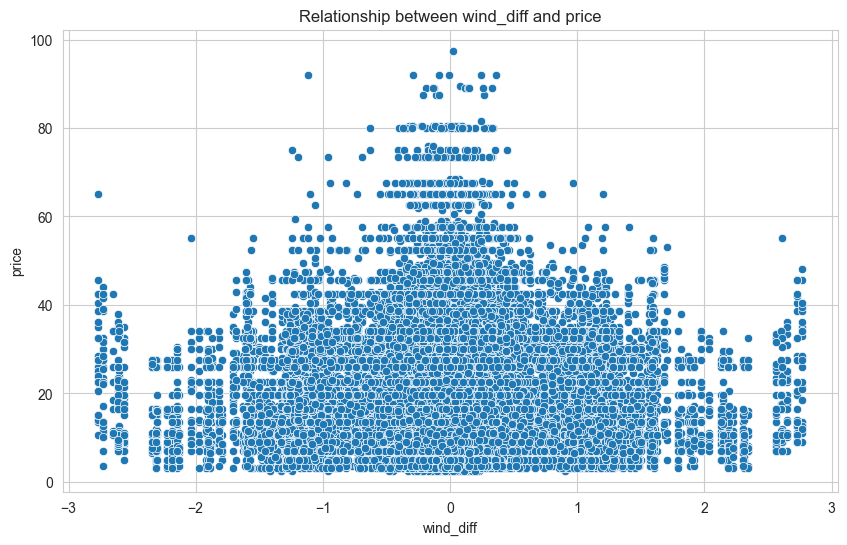

In [256]:
import seaborn as sns

import matplotlib.pyplot as plt

# Lista zmiennych do wykresów
variables = train_df.columns.tolist()
variables.remove('price')

# Tworzenie wykresów
for var in variables:
    plt.figure(figsize=(10, 6))
    sns.scatterplot(data=train_df, x=var, y='price')
    plt.title(f'Relationship between {var} and price')
    plt.xlabel(var)
    plt.ylabel('price')
    plt.show()

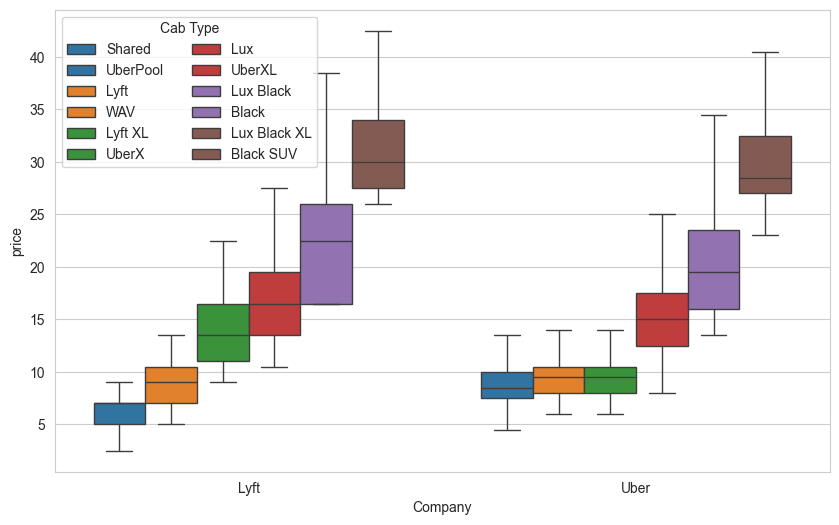

In [267]:
plt.figure(figsize=(10, 6))
sns.set_style("whitegrid")
sns.boxplot(x='Uber', y='price', data=train_df.astype({'name': 'category'})
            ,hue='name', showfliers=False)
plt.legend(title='Cab Type', labels=['Shared' ,
                                    'UberPool',
                                    'Lyft' ,
                                    'WAV',
                                    'Lyft XL' ,
                                    'UberX',
                                    'Lux' ,
                                    'UberXL',
                                    'Lux Black' ,
                                    'Black',
                                    'Lux Black XL' ,
                                    'Black SUV'], ncol=2)
plt.xticks(ticks=[0, 1], labels=['Lyft', 'Uber'])
plt.xlabel('Company')
plt.show()

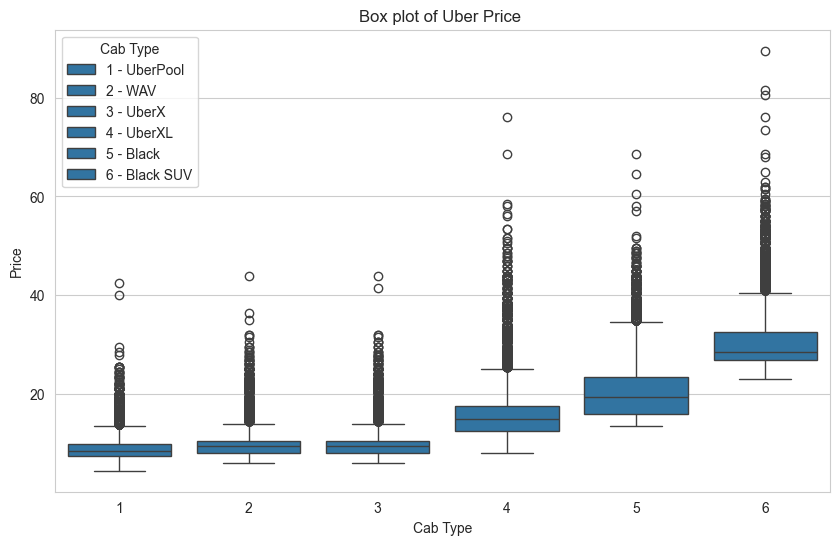

In [258]:
plt.figure(figsize=(10, 6))
plt.title('Box plot of Uber Price ')
plt.xlabel('Cab Type')
plt.ylabel('Price')
train_df_uber = train_df[train_df['Uber'] == 1]
sns.boxplot(x='name', y='price', data=train_df_uber)
plt.legend(title='Cab Type', labels=['1 - UberPool', '2 - WAV', '3 - UberX', '4 - UberXL', '5 - Black', '6 - Black SUV'])
plt.show() 

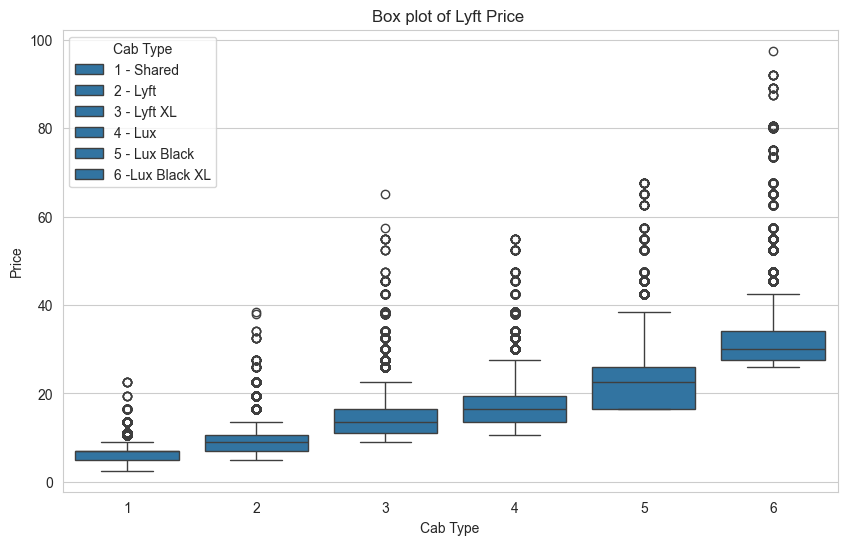

In [259]:
plt.figure(figsize=(10, 6))
plt.title('Box plot of Lyft Price ')
plt.xlabel('Cab Type')
plt.ylabel('Price')
train_df_uber = train_df[train_df['Uber'] == 0]
sns.boxplot(x='name', y='price', data=train_df_uber)
plt.legend(title='Cab Type', labels=['1 - Shared', '2 - Lyft', '3 - Lyft XL', '4 - Lux', '5 - Lux Black', '6 -Lux Black XL'])
plt.show()

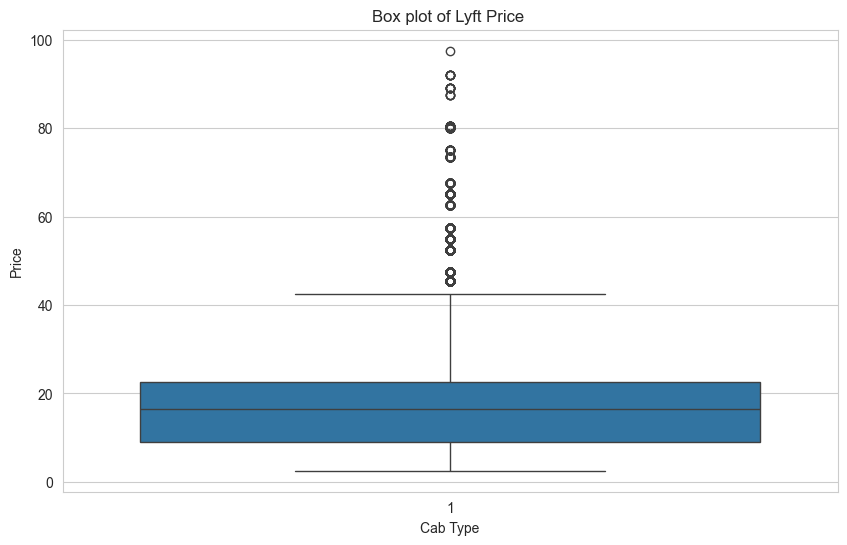

In [188]:
plt.figure(figsize=(10, 6))
plt.title('Box plot of Lyft Price ')
plt.xlabel('Cab Type')
plt.ylabel('Price')
train_df_lyft = train_df[train_df['Lyft'] == 1]
sns.boxplot(x='Lyft', y='price', data=train_df_lyft)
plt.show()

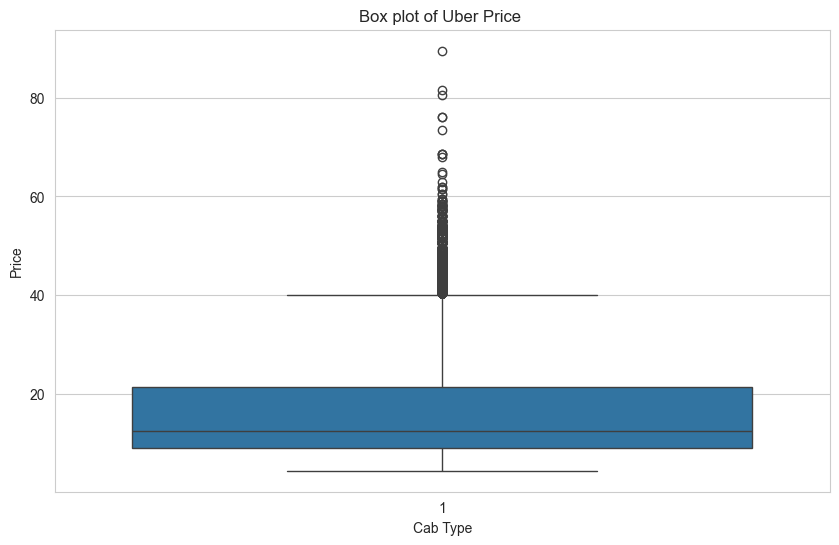

In [268]:
plt.figure(figsize=(10, 6))
plt.title('Box plot of Uber Price ')
plt.xlabel('Cab Type')
plt.ylabel('Price')
train_df_lyft = train_df[train_df['Uber'] == 1]
sns.boxplot(x='Uber', y='price', data=train_df_lyft)
plt.show()

In [269]:
train_df.to_pickle("../data/outputs/2.feature_engineering/train_df.pkl")
test_df.to_pickle("../data/outputs/2.feature_engineering/test_df.pkl")

In [270]:
del train_df
del test_df
gc.collect()

545416

# Feature selection

In [271]:
train_df=pd.read_pickle("../data/outputs/2.feature_engineering/train_df.pkl")
test_df=pd.read_pickle("../data/outputs/2.feature_engineering/test_df.pkl")

In [272]:
corr_res = he.get_feat_rank_corr(train_df,{'target':'price'})
corr_res

variable      corr  corr_rank
name                          name  0.835019          1
distance                  distance  0.345631          2
surge_multiplier  surge_multiplier  0.239331          3
dest_longitude      dest_longitude -0.113620          4
source_longitude  source_longitude -0.109930          5
source_latitude    source_latitude -0.094977          6
Uber                          Uber -0.082487          7
dest_latitude        dest_latitude -0.071774          8
latitude_diff        latitude_diff -0.015111          9
humidity_diff        humidity_diff -0.003063         10
clouds_diff            clouds_diff  0.002874         11
temp_diff                temp_diff  0.002770         12
longitude_diff      longitude_diff  0.002472         13
weekday                    weekday  0.002232         14
source_humidity    source_humidity -0.001944         15
source_clouds        source_clouds  0.001696         16
dest_humidity        dest_humidity -0.001647         17
dest_clouds            dest_clouds  0.001577         18
source_rain            source_rain -0.001318         19
is_weekend              is_weekend  0.001308         20
time_sin                  time_sin  0.001120         21
dest_wind                dest_wind -0.001120         22
source_wind            source_wind -0.001111         23
rain_diff                rain_diff -0.001109         24
dest_pressure        dest_pressure  0.000835         25
source_pressure    source_pressure  0.000835         26
dest_rain                dest_rain -0.000626         27
dest_temp                dest_temp -0.000148         28
wind_diff                wind_diff  0.000142         29
source_temp            source_temp  0.000030         30
pressure_diff        pressure_diff -0.000005         31

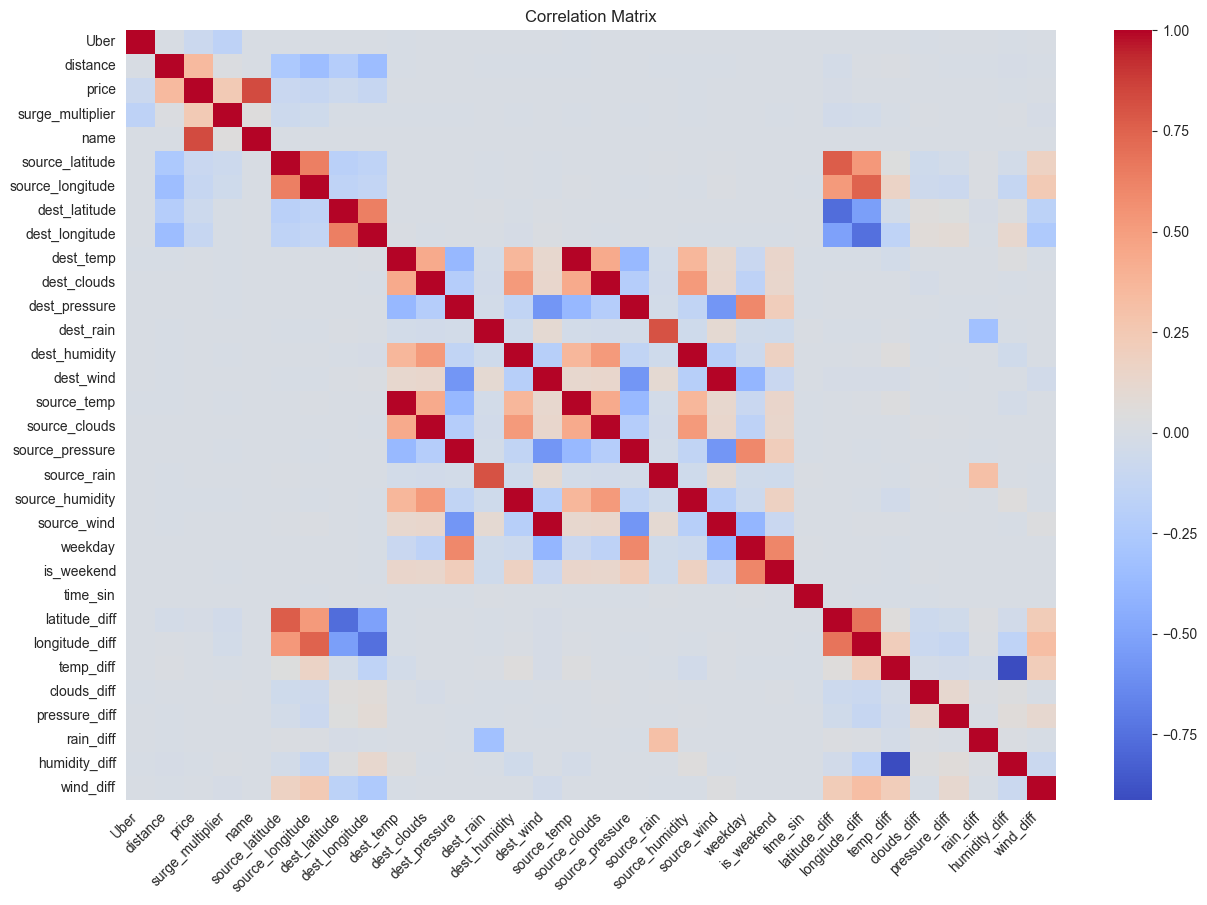

In [273]:
# Calculate the correlation matrix
correlation_matrix = train_df.corr()

# Plot the heatmap
plt.figure(figsize=(15, 10))
sns.heatmap(correlation_matrix, annot=False, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Matrix')
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.show()

In [274]:
import funs.helpers_2 as he
import importlib
importlib.reload(he)
import funs.helpers_2 as he

In [275]:
fs_params = {
    'target':'price',
    'method':'rank_corr',
    'n_vars':15,
    'kwarg':'SVM',
}
train_selected, test_selected, metrics = he.select_features(train_df,test_df,fs_params,corr_res=corr_res)

In [276]:
import json
with open('../data/outputs/2.feature_engineering/fs_results.json', 'w') as f:
    json.dump(metrics, f)

In [277]:
metrics

{'columns': ['name',
  'distance',
  'surge_multiplier',
  'dest_longitude',
  'source_longitude',
  'source_latitude',
  'Uber',
  'dest_latitude',
  'latitude_diff',
  'humidity_diff',
  'clouds_diff',
  'temp_diff',
  'longitude_diff',
  'weekday',
  'source_humidity'],
 'criteria': {'method': 'rank_corr', 'n_vars': 15, 'kwarg': 'SVM'}}

In [278]:
train_selected.to_pickle("../data/outputs/2.feature_engineering/train_selected.pkl")
test_selected.to_pickle("../data/outputs/2.feature_engineering/test_selected.pkl")